In [1]:
# pip install -r requirements.txt

In [2]:
# Importing all the libraries in use


import os
import argparse
from pydub import AudioSegment
import librosa
import soundfile as sf
from IPython.display import Audio, IFrame, display
import IPython.display as ipd
import matplotlib.pyplot as plt
from cmath import exp, pi
import numpy as np
import soundfile as sf
import numpy.fft as fft
from scipy.io import wavfile
from scipy import signal
import noisereduce as nr

In [3]:
# This cell stores all the path of the audio files of group members 
# in a file_path variable which will be used in subsequent cells

path = ["Jason/", "Karina/", "Rifa/", "Ruchit/"]

file_path = []
for i in path:
    for(dirpath, dirnames, filenames) in os.walk(i):
        res = [i+x for x in filenames]
        file_path += res
file_path

['Jason/s4.wav',
 'Jason/s2.wav',
 'Jason/s3.wav',
 'Jason/s1.wav',
 'Karina/Sentence1.wav',
 'Karina/Sentence3.wav',
 'Karina/Sentence2.wav',
 'Karina/Sentence4.wav',
 'Rifa/Sentence 3.wav',
 'Rifa/Sentence 2.wav',
 'Rifa/Sentence 1.wav',
 'Rifa/Sentence 4.wav',
 'Ruchit/st4.wav',
 'Ruchit/st2.wav',
 'Ruchit/st3.wav',
 'Ruchit/st1.wav']

In [4]:
# This cell converts all file format to wav

formats_to_convert = ['.m4a']

for i in path:
    for (dirpath, dirnames, filenames) in os.walk(i):
        for filename in filenames:
            if filename.endswith(tuple(formats_to_convert)):

                filepath = dirpath + '/' + filename
                (path, file_extension) = os.path.splitext(filepath)
                file_extension_final = file_extension.replace('.', '')
                try:
                    track = AudioSegment.from_file(filepath,
                            file_extension_final)
                    wav_filename = filename.replace(file_extension_final, 'wav')
                    wav_path = dirpath + '/' + wav_filename
                    print('CONVERTING: ' + str(filepath))
                    file_handle = track.export(wav_path, format='wav')
                    os.remove(filepath)
                except:
                    print("ERROR CONVERTING " + str(filepath))

In [5]:
# function custom in use 
def lowest_power_of_2(x):
    i = 1;
    while i < x : i*=2;
    return i

In [6]:
# sample the input audio file to 500, 2000 and 16000Hz;
freq = [500, 2000, 16000]

# File in file_path from previous cells
for i in file_path:
    # reading the audio file using wavfile from scipy library
    sample_rate, audio_data = wavfile.read(i)

    # Initial Audio Processing
    x = len(audio_data.shape)
    if(x > 1) :
        audio_data = audio_data[:,0]
    audio = np.asarray(audio_data)
    N = len(audio)
    lp2 = lowest_power_of_2(N)
    audio = np.pad(audio, (0,lp2 - N), 'constant')
    dur = len(audio)/float(sample_rate)

    # frequency change
    for f in freq : 
        nsample = int( dur * f)
        a_freq = np.interp(np.linspace(0, len(audio), nsample, endpoint = False), np.arange(len(audio)), audio)
        wavfile.write("Audiorecording/" + str(f) + "_" + i.split("/")[0] + "_" + i.split("/")[1], f, a_freq.astype(np.int16))

In [7]:
# updating file_path to the newest sampled files
# Now this varibale file_path contains sampled files

file_path = []
folder_path = "Audiorecording/"
for (dirpath ,dirnames, filenames) in os.walk(folder_path):
    file_path = [folder_path + x for x in filenames]
file_path

['Audiorecording/500_Rifa_Sentence 4.wav',
 'Audiorecording/16000_Karina_Sentence4.wav',
 'Audiorecording/2000_Jason_s4.wav',
 'Audiorecording/500_Jason_s4.wav',
 'Audiorecording/500_Jason_s3.wav',
 'Audiorecording/16000_Karina_Sentence3.wav',
 'Audiorecording/2000_Jason_s3.wav',
 'Audiorecording/500_Rifa_Sentence 3.wav',
 'Audiorecording/500_Rifa_Sentence 2.wav',
 'Audiorecording/2000_Jason_s2.wav',
 'Audiorecording/16000_Karina_Sentence2.wav',
 'Audiorecording/500_Jason_s2.wav',
 'Audiorecording/500_Rifa_Sentence 1.wav',
 'Audiorecording/2000_Jason_s1.wav',
 'Audiorecording/16000_Karina_Sentence1.wav',
 'Audiorecording/500_Jason_s1.wav',
 'Audiorecording/16000_Rifa_Sentence 2.wav',
 'Audiorecording/2000_Ruchit_st1.wav',
 'Audiorecording/16000_Rifa_Sentence 3.wav',
 'Audiorecording/16000_Rifa_Sentence 1.wav',
 'Audiorecording/2000_Ruchit_st2.wav',
 'Audiorecording/2000_Ruchit_st3.wav',
 'Audiorecording/2000_Rifa_Sentence 4.wav',
 'Audiorecording/500_Ruchit_st4.wav',
 'Audiorecording/1

In [8]:
# This is a fuction that calculated the FFT of a signal
# The mathematics behind this is taken from an article

def dft(x):
    N = len(x)
    if N <= 1: 
        return x
    if N%2 !=0:
        x = np.append(x,np.zeros(1))
        N+=1
    
    even = dft(x[0::2])
    odd =  dft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

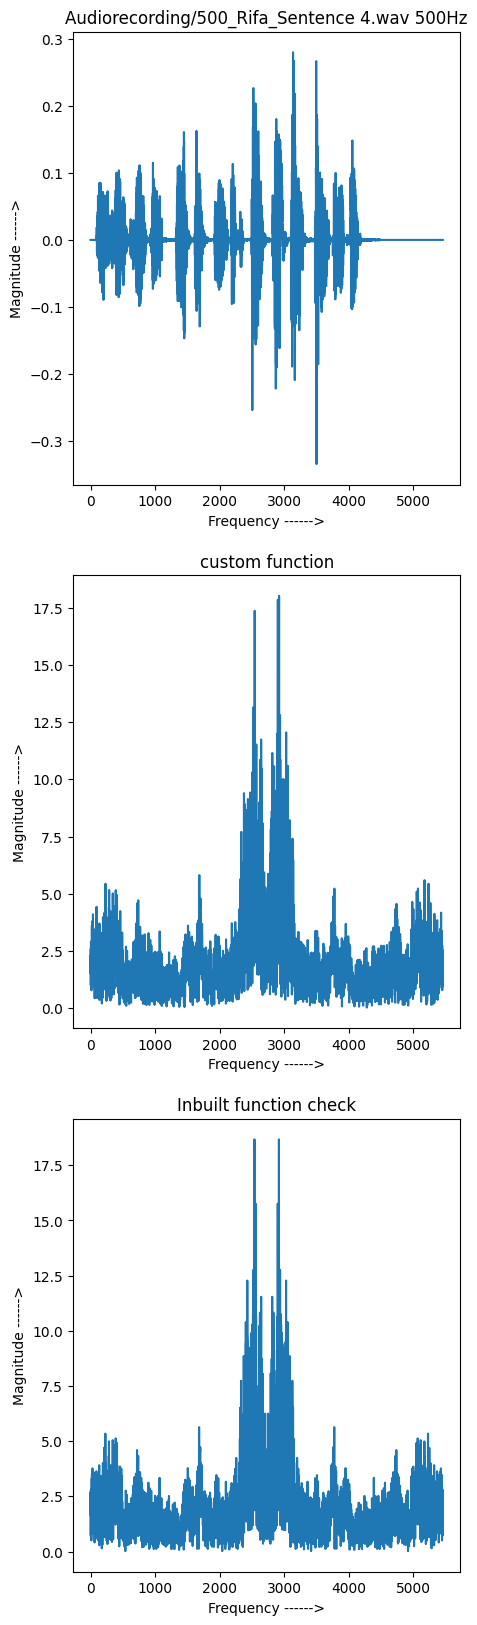

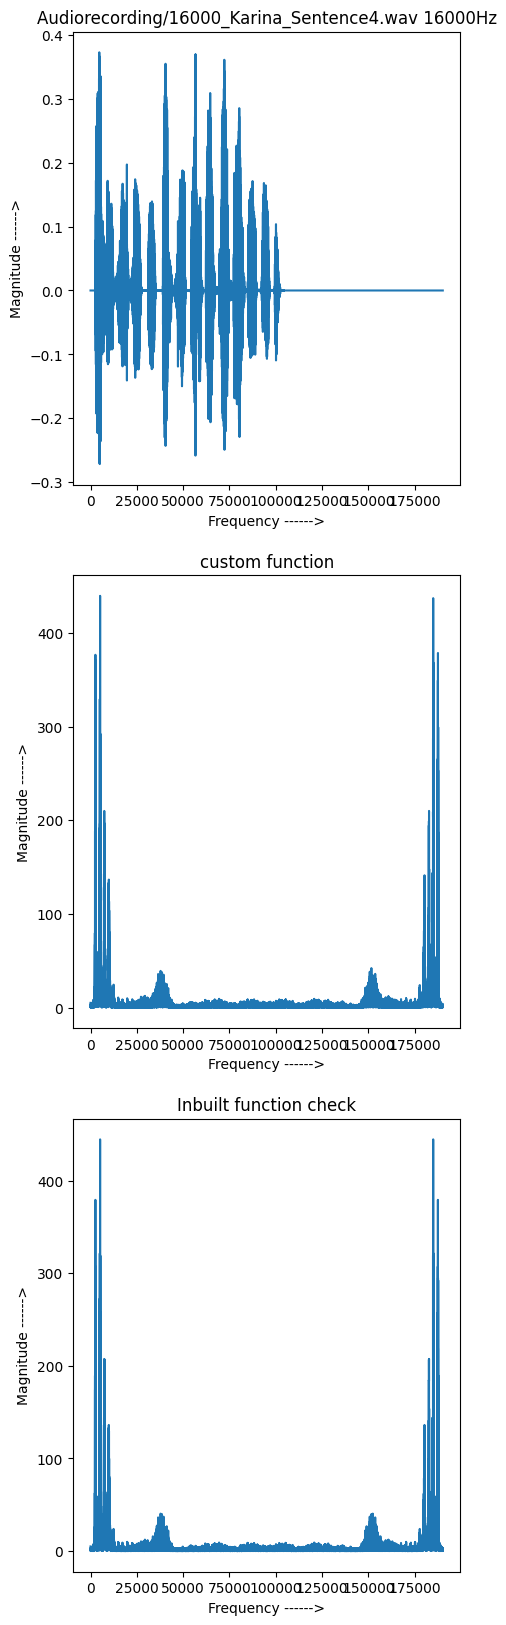

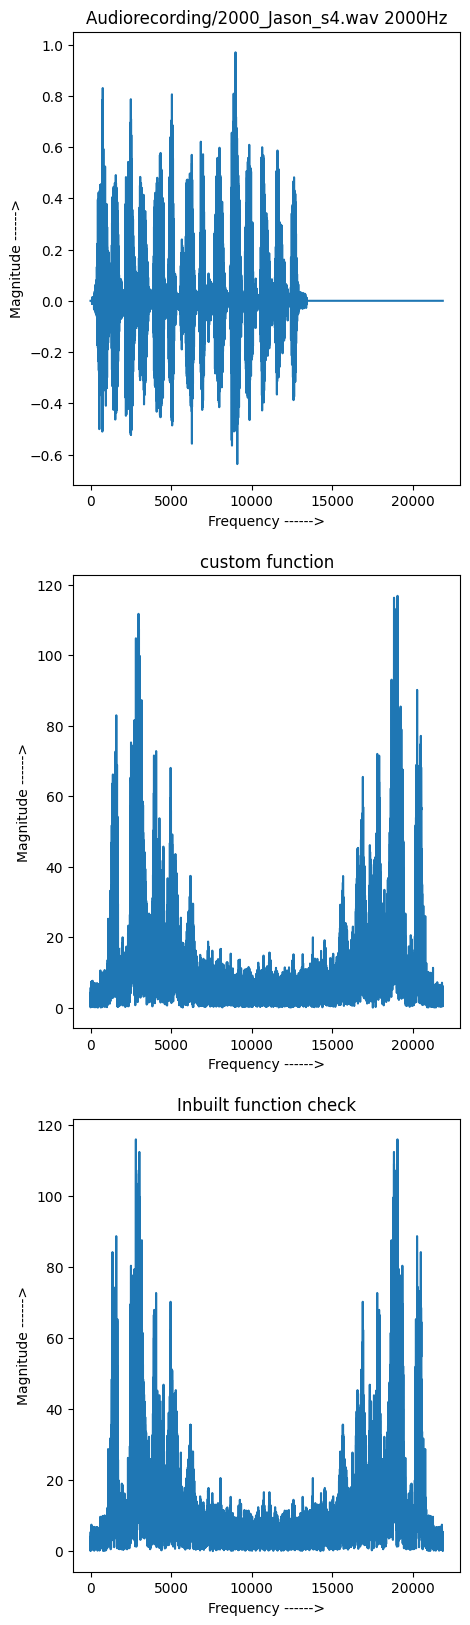

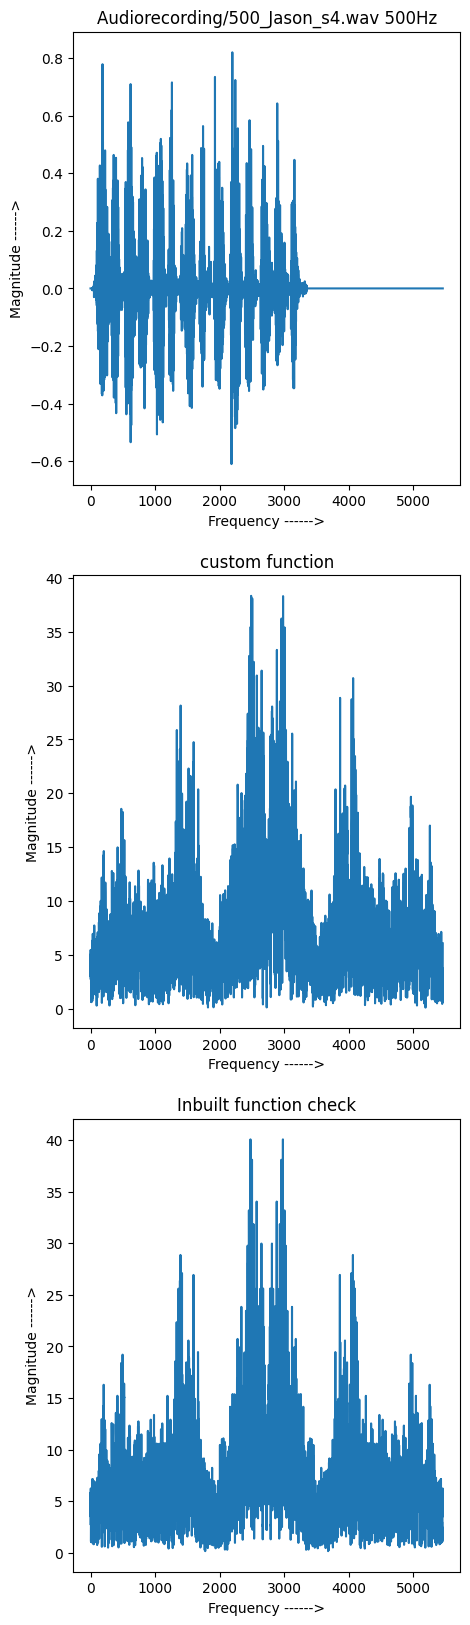

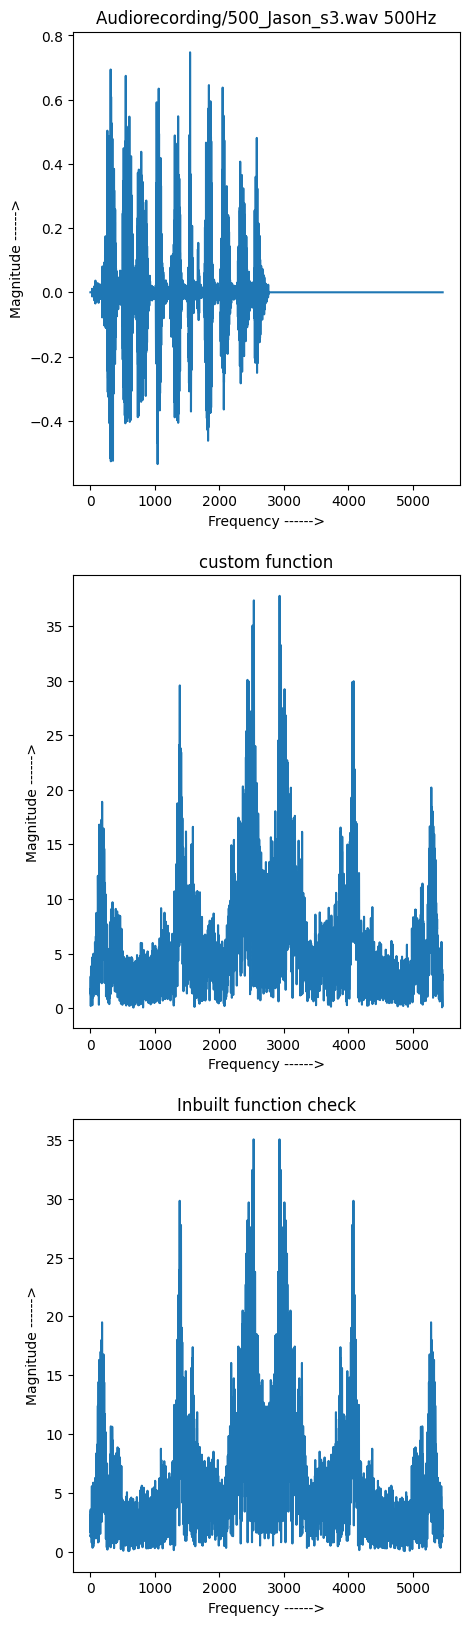

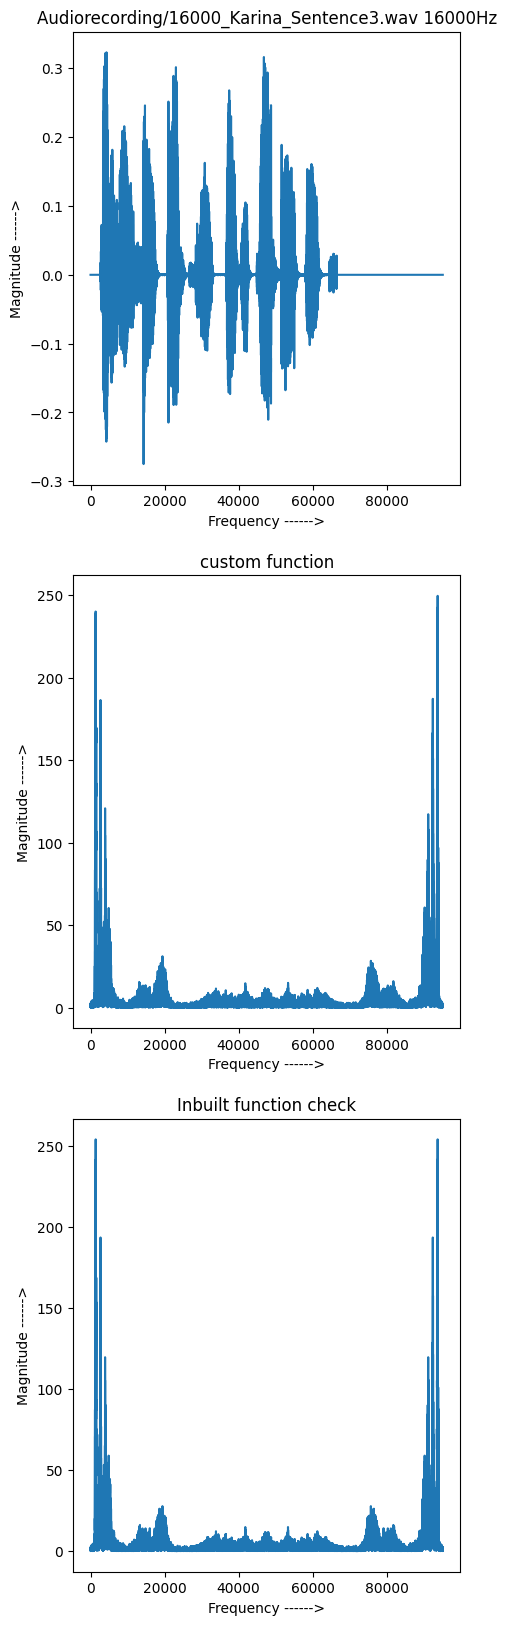

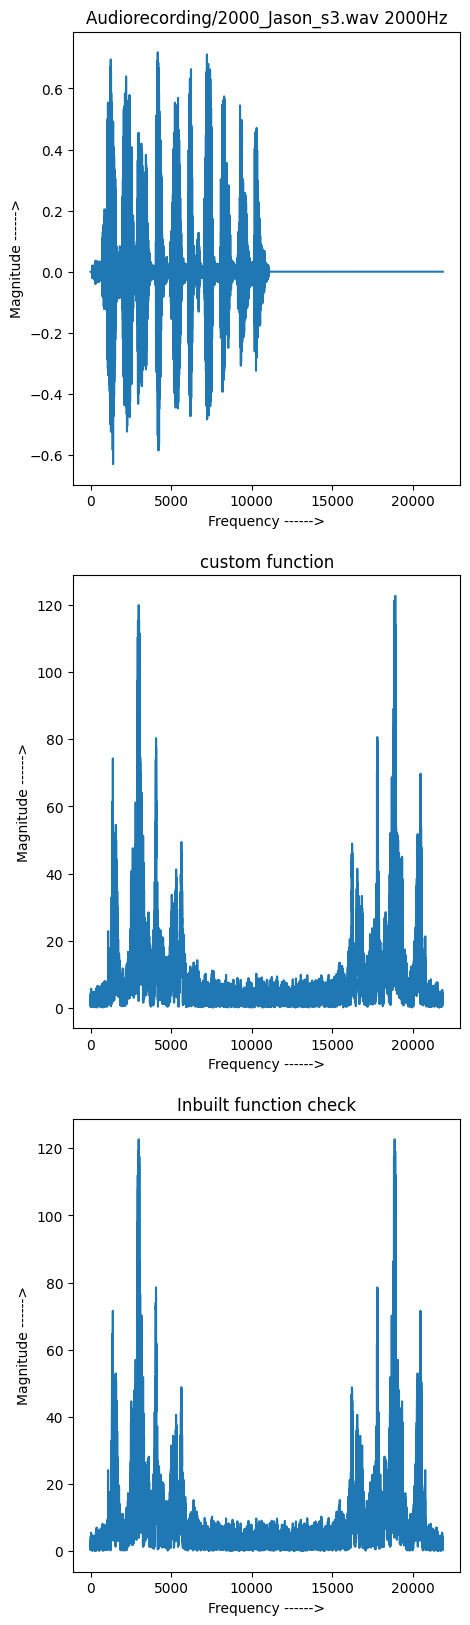

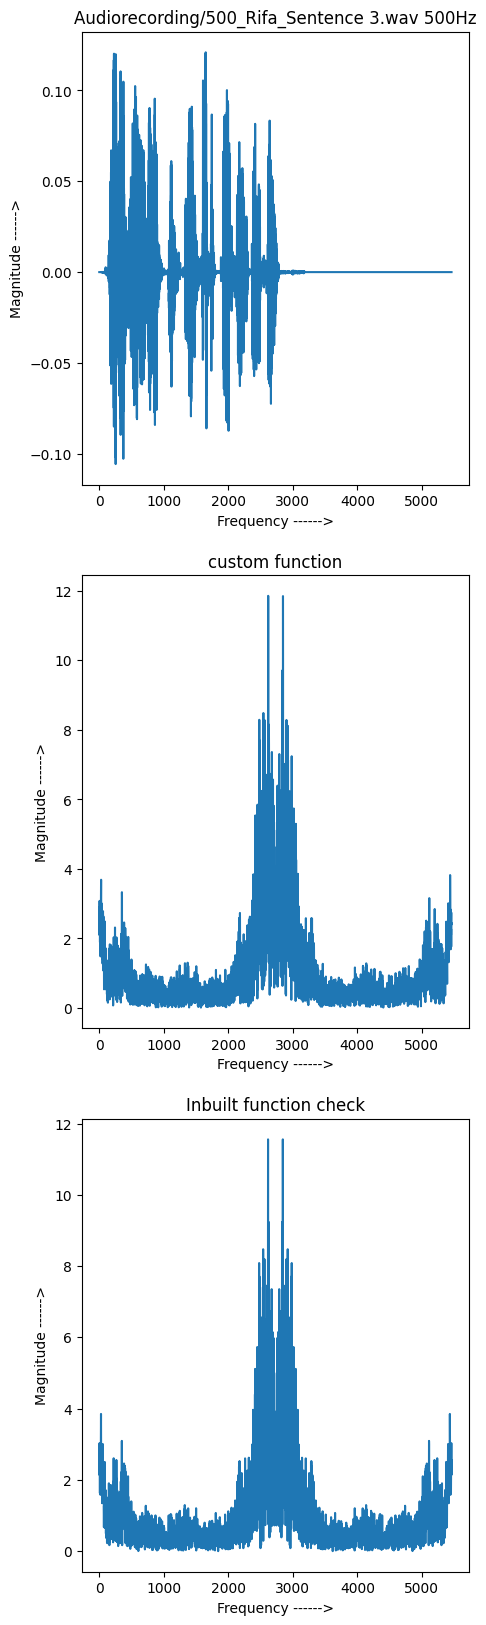

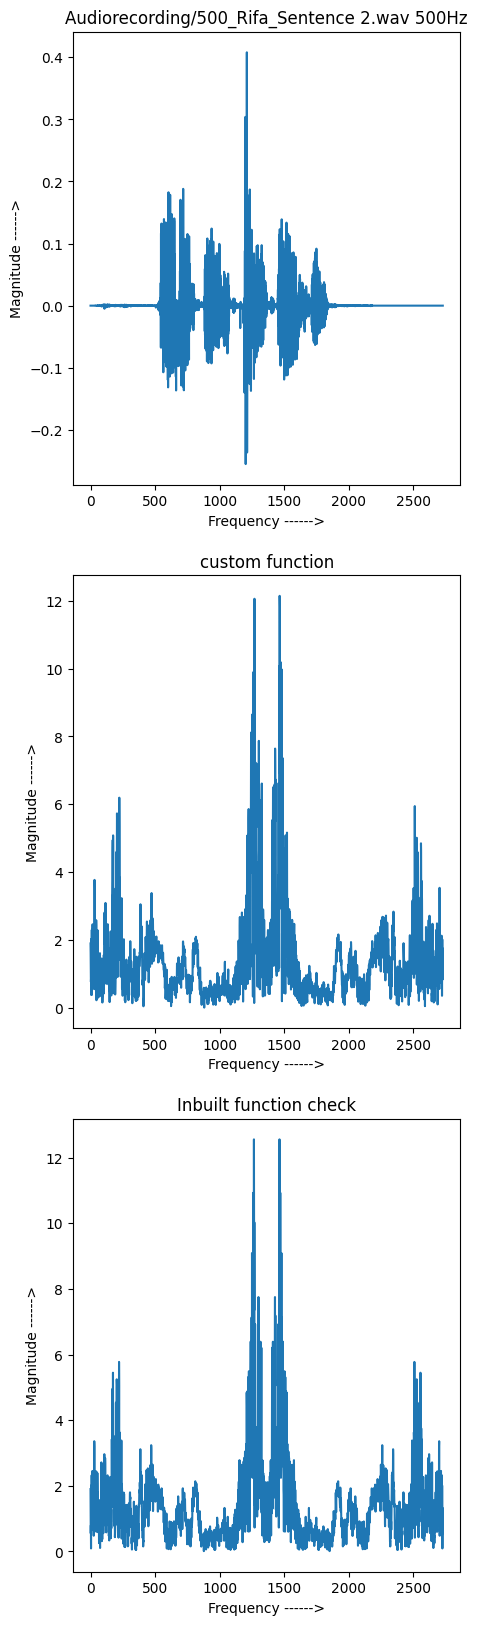

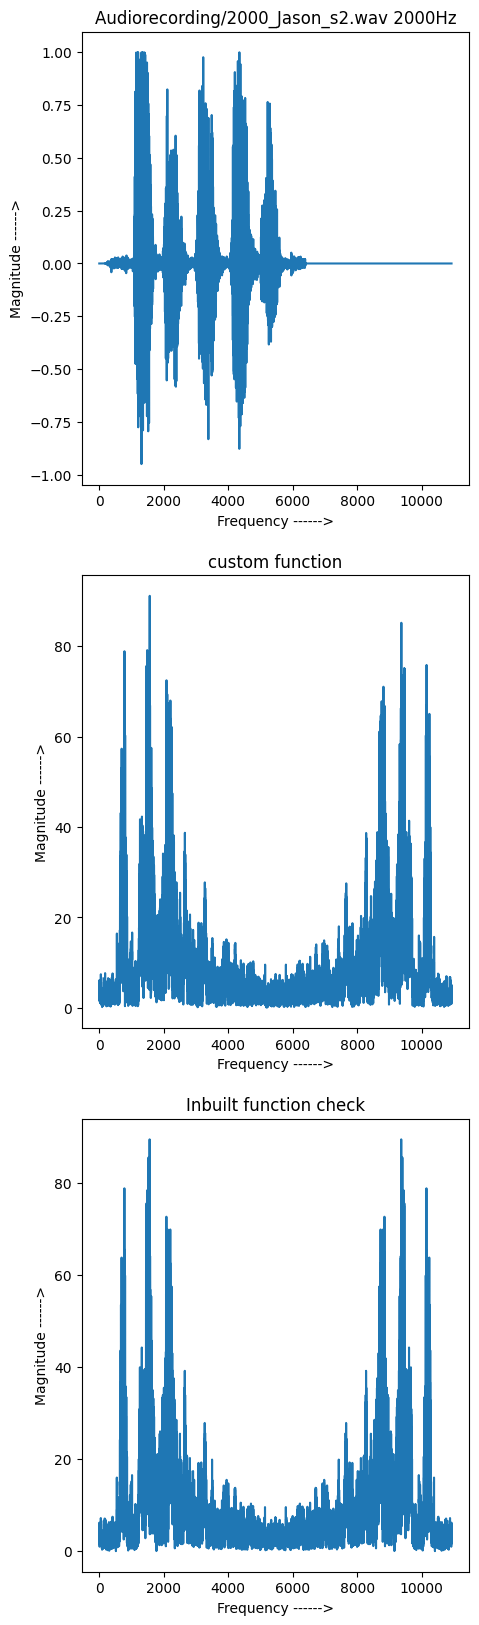

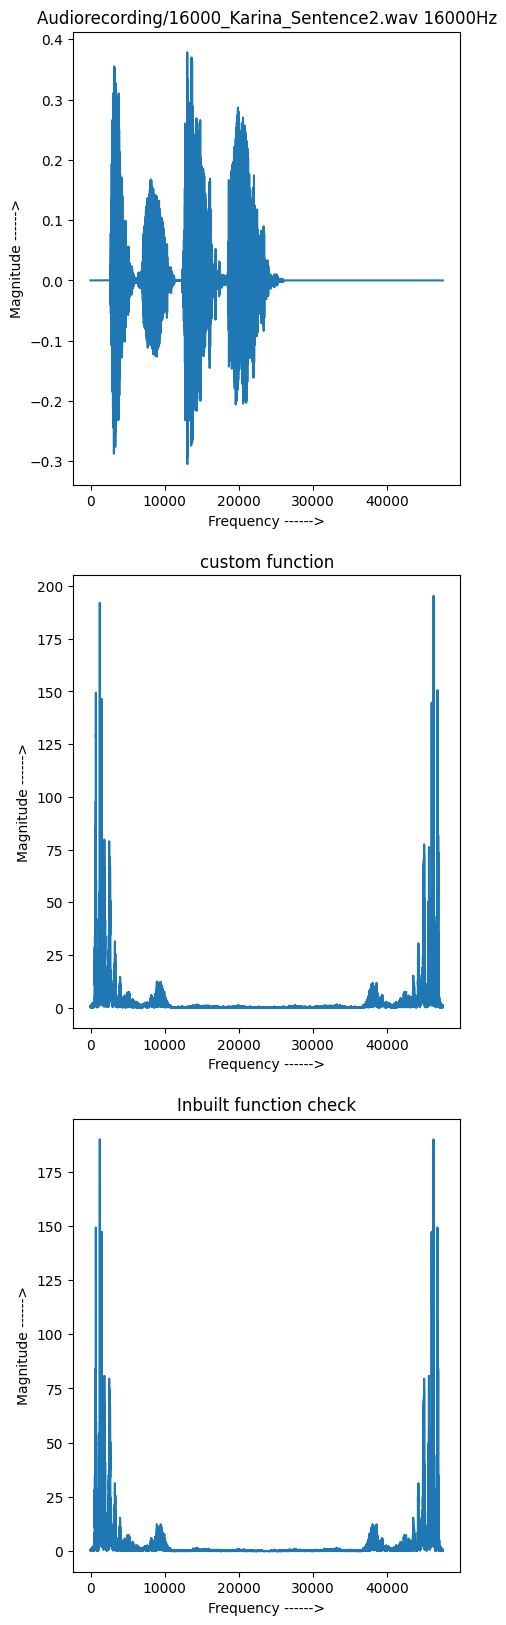

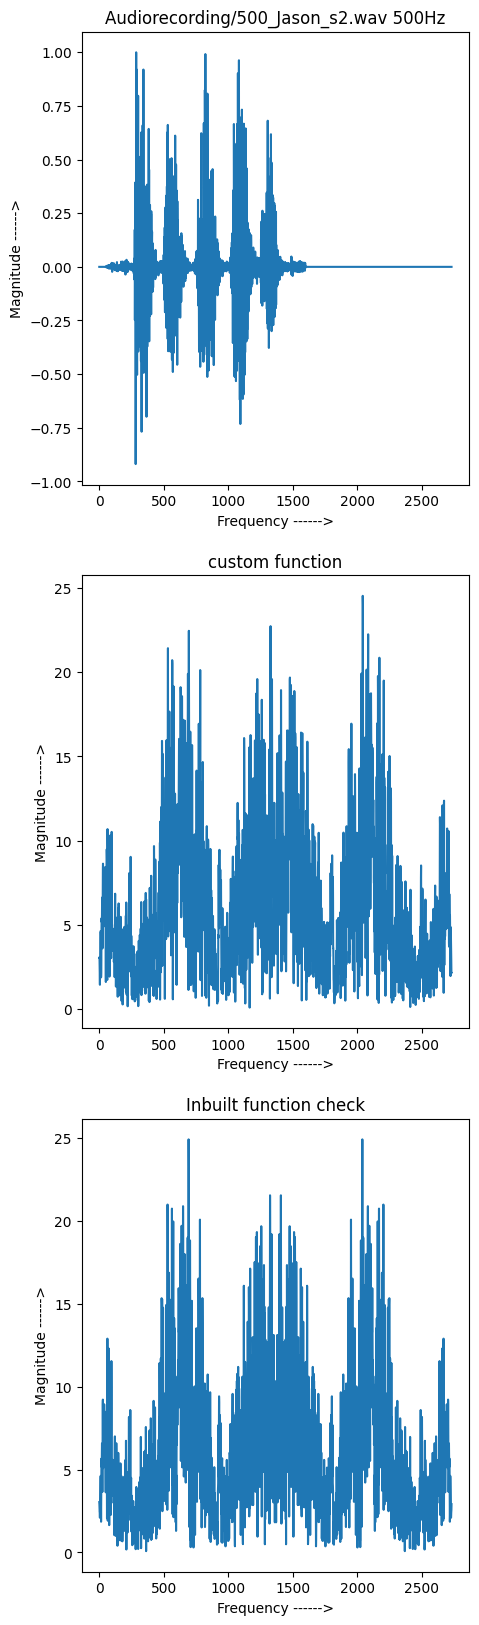

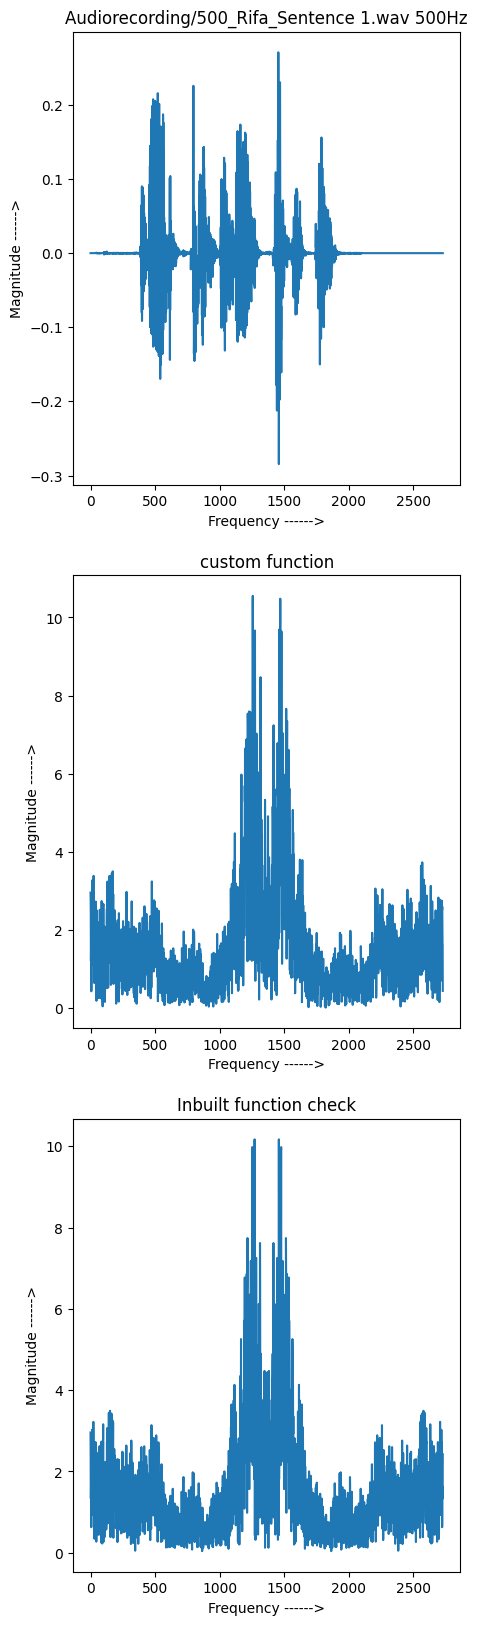

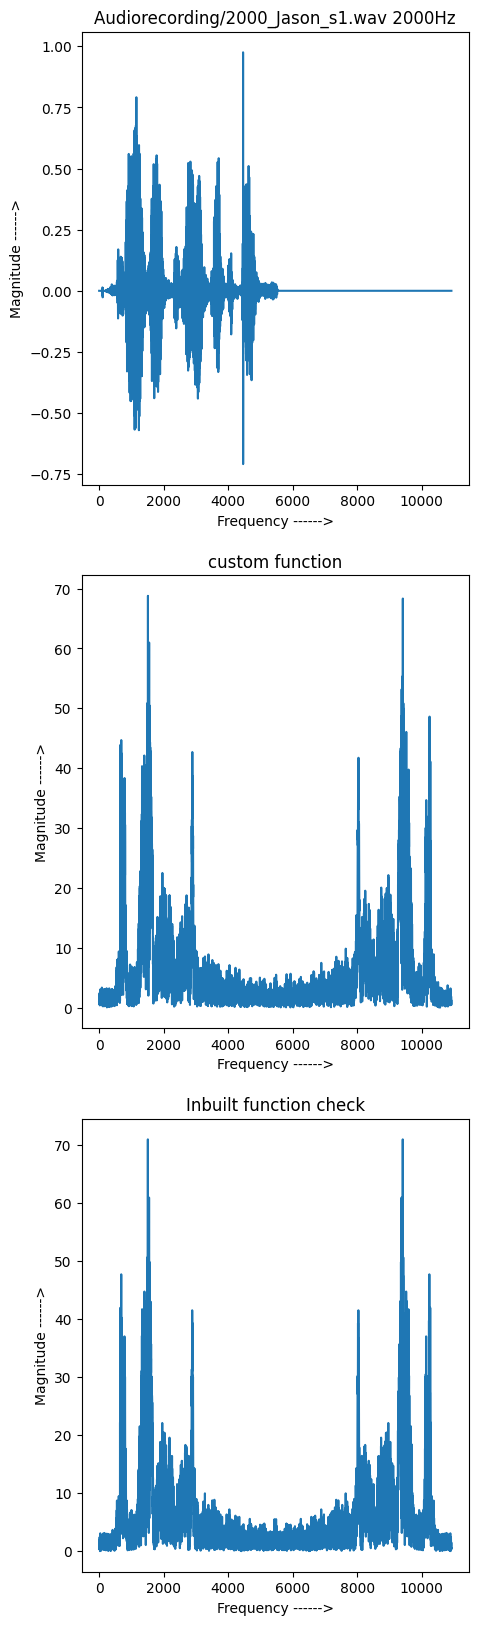

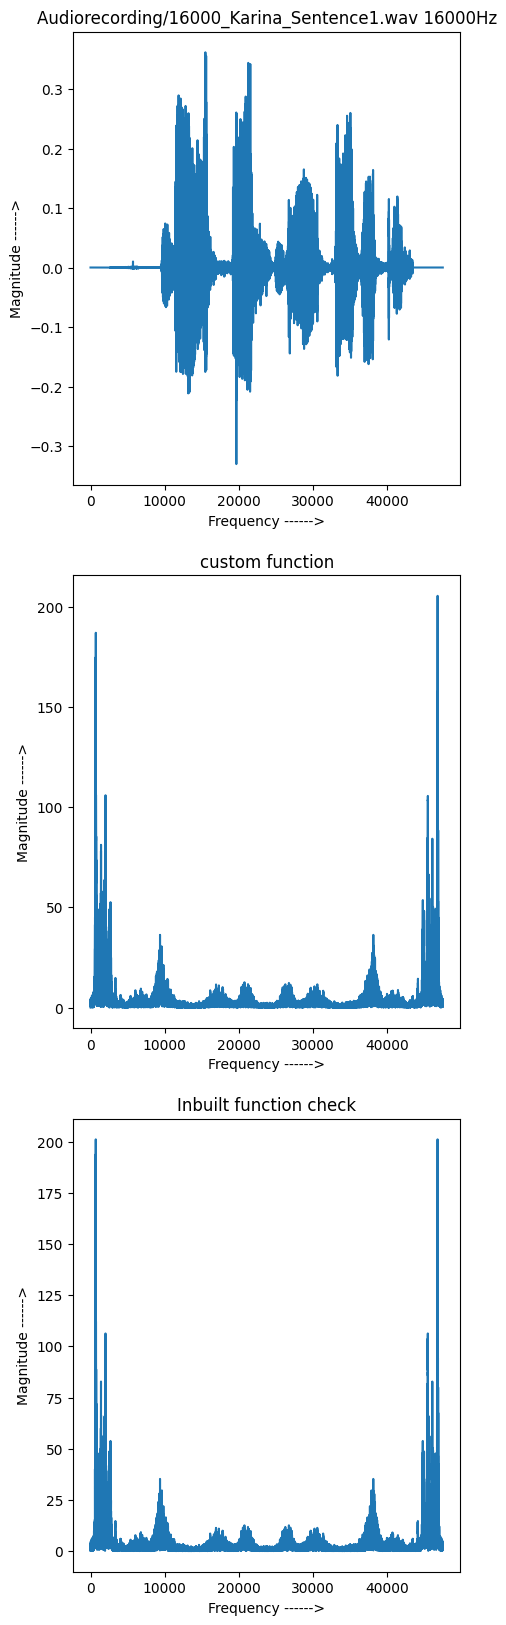

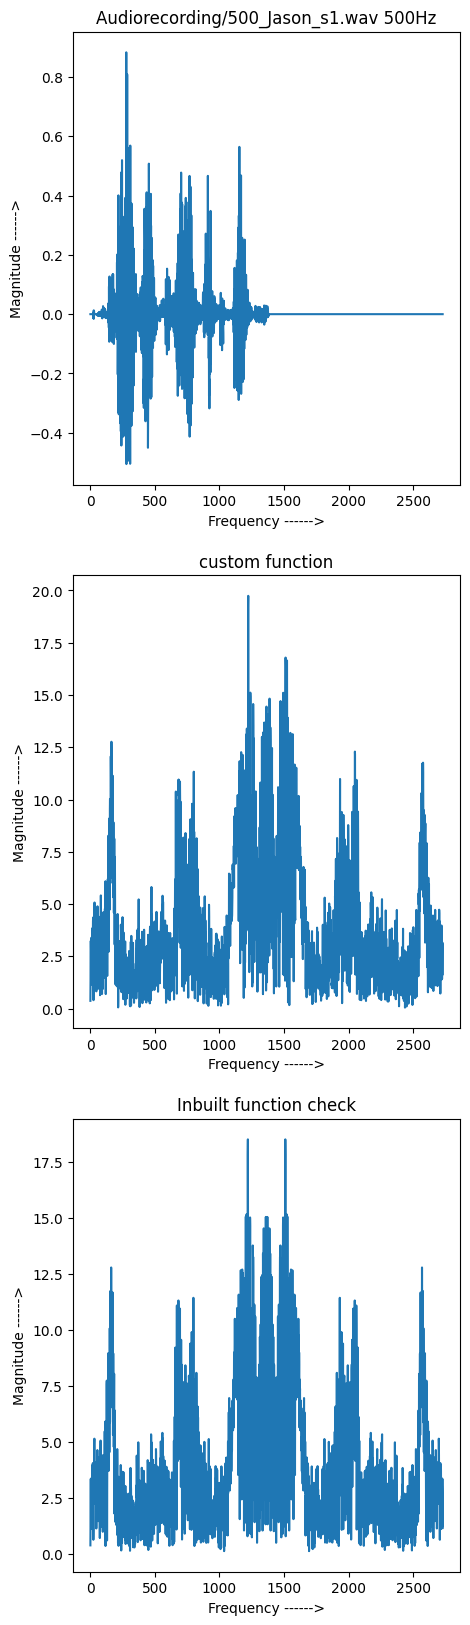

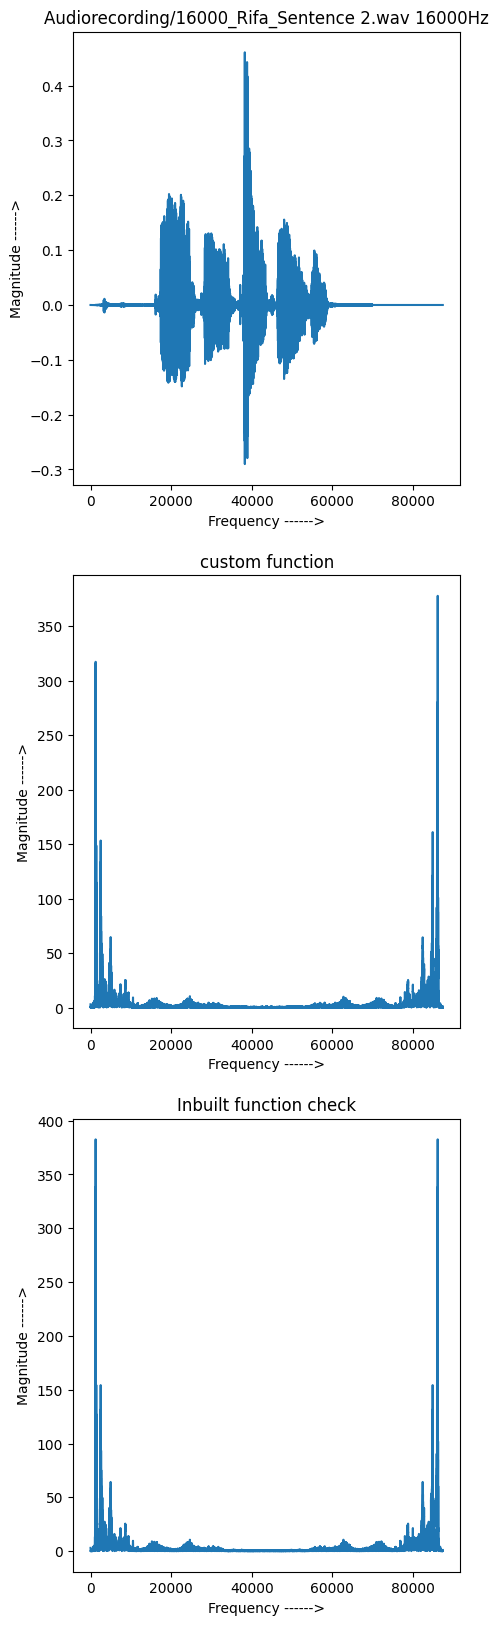

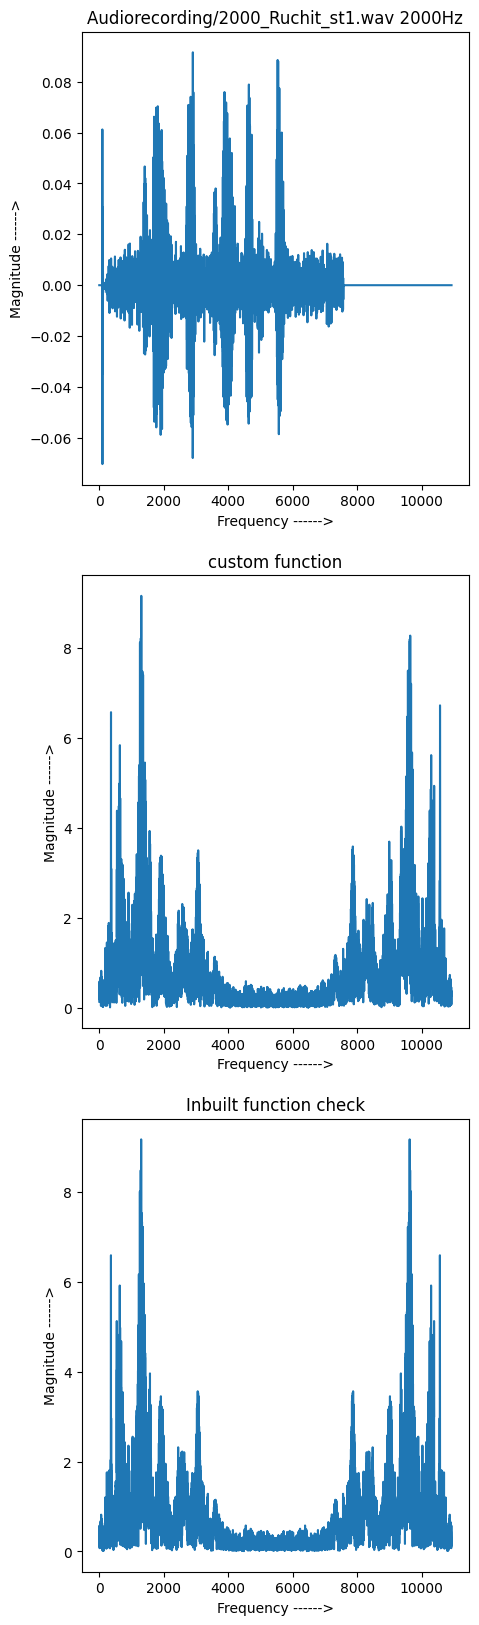

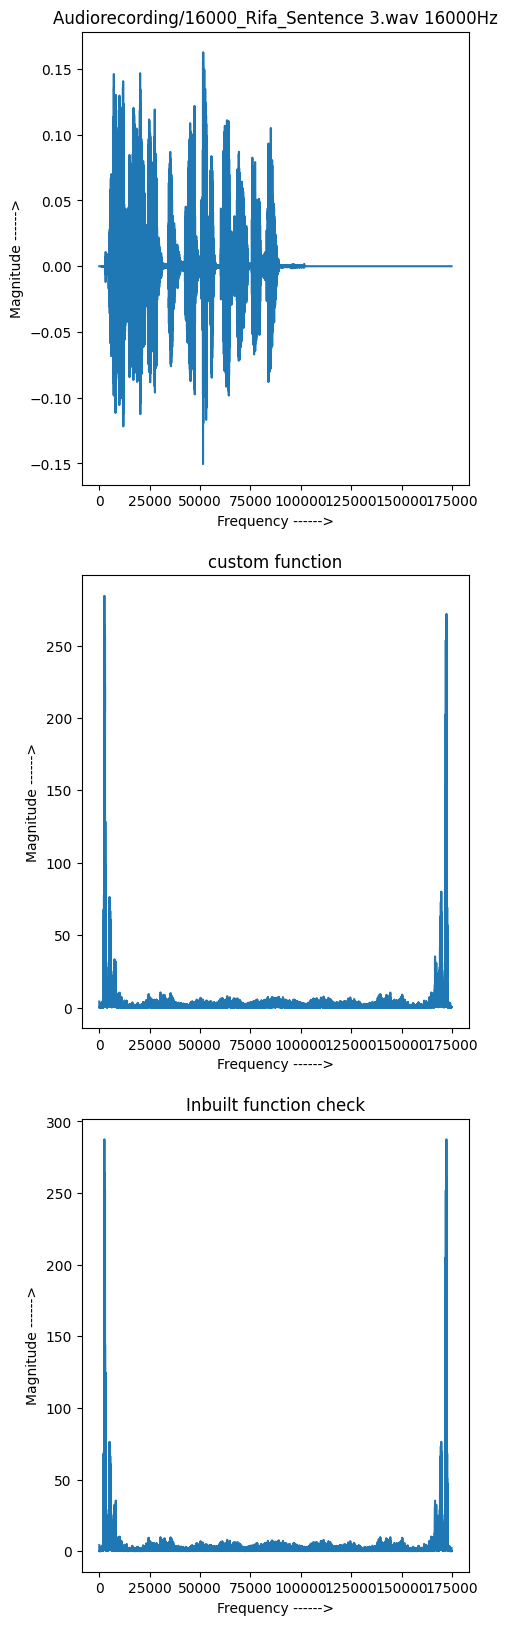

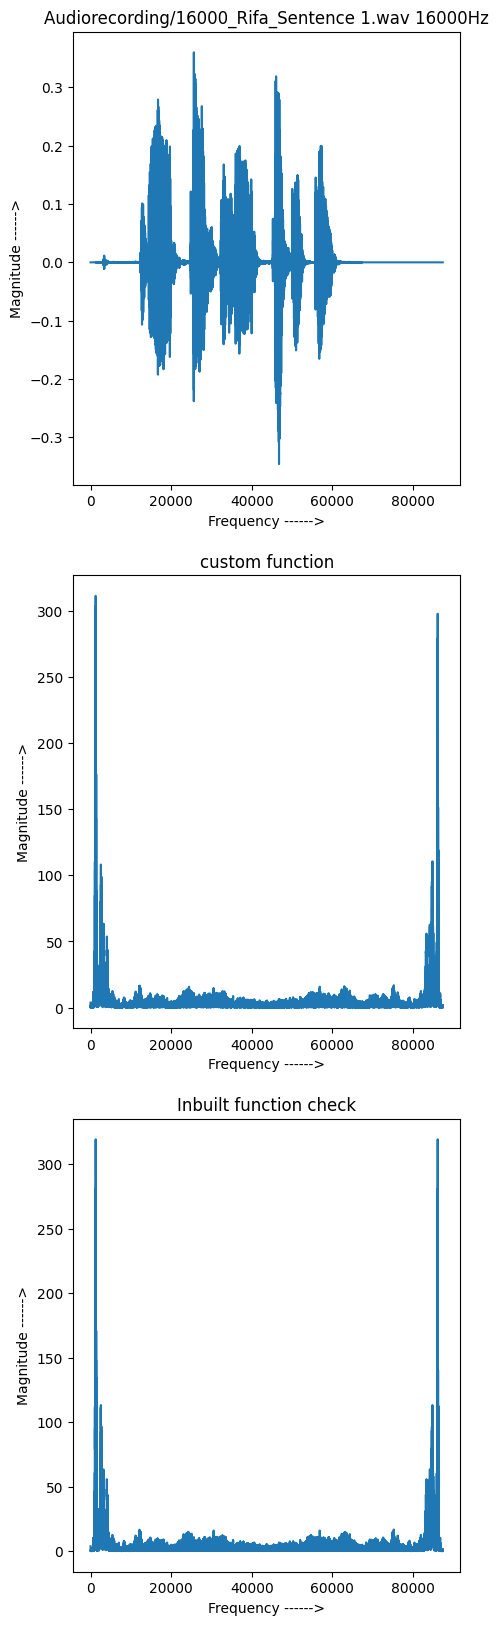

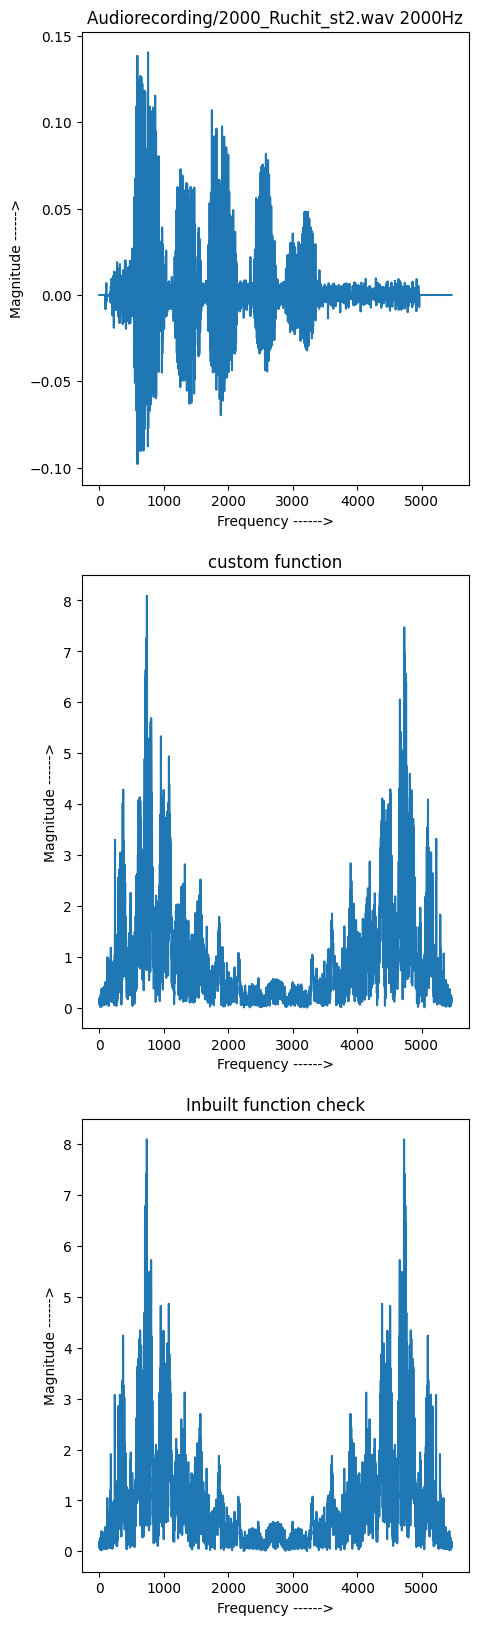

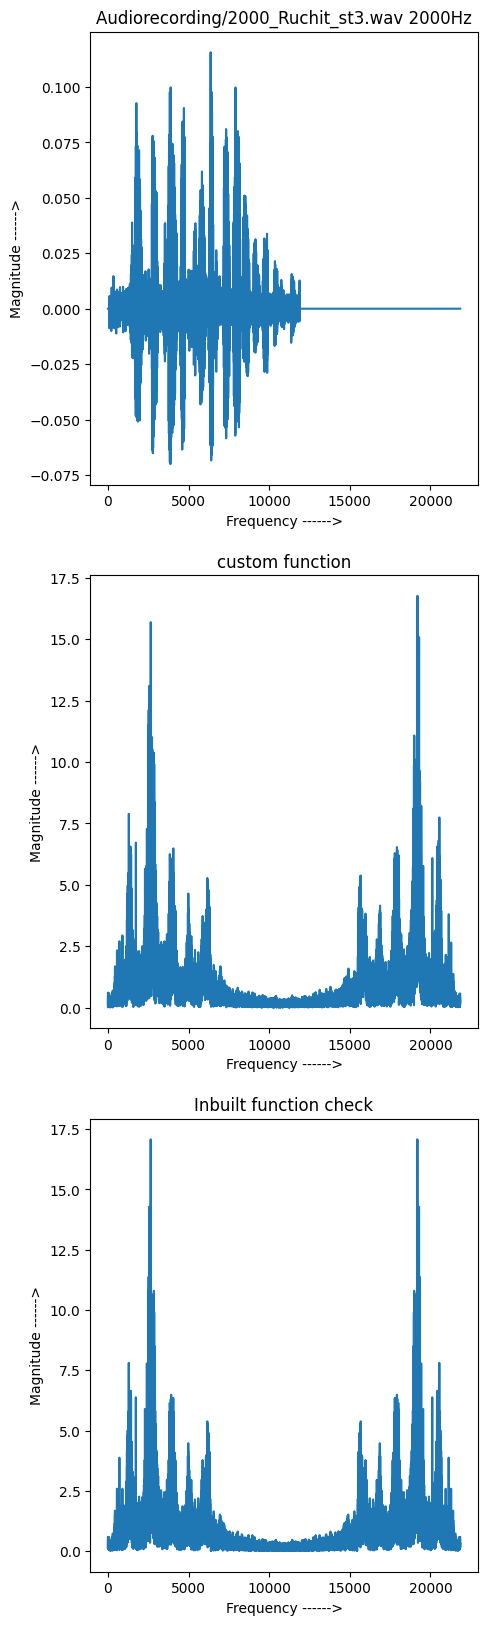

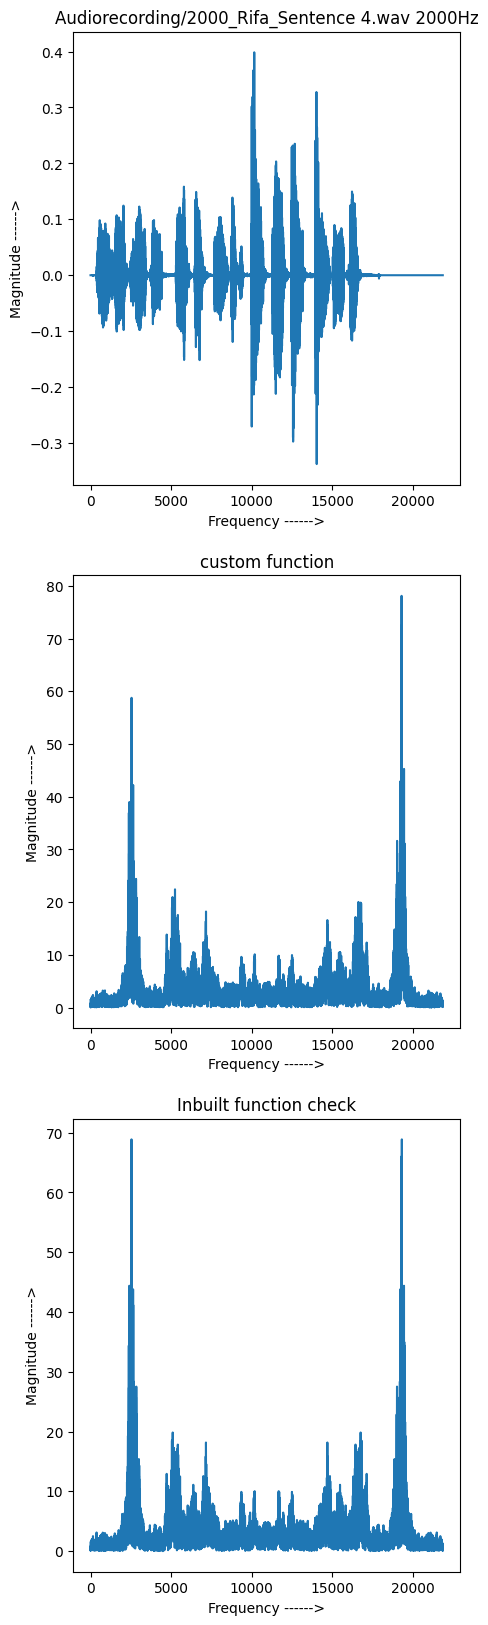

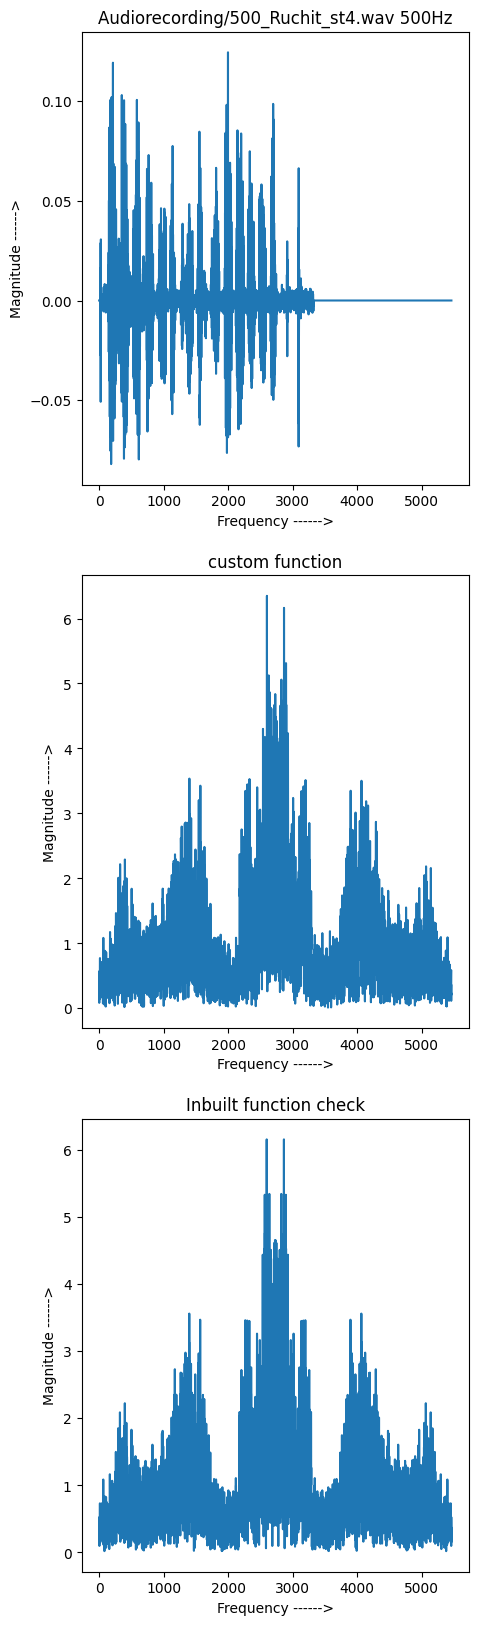

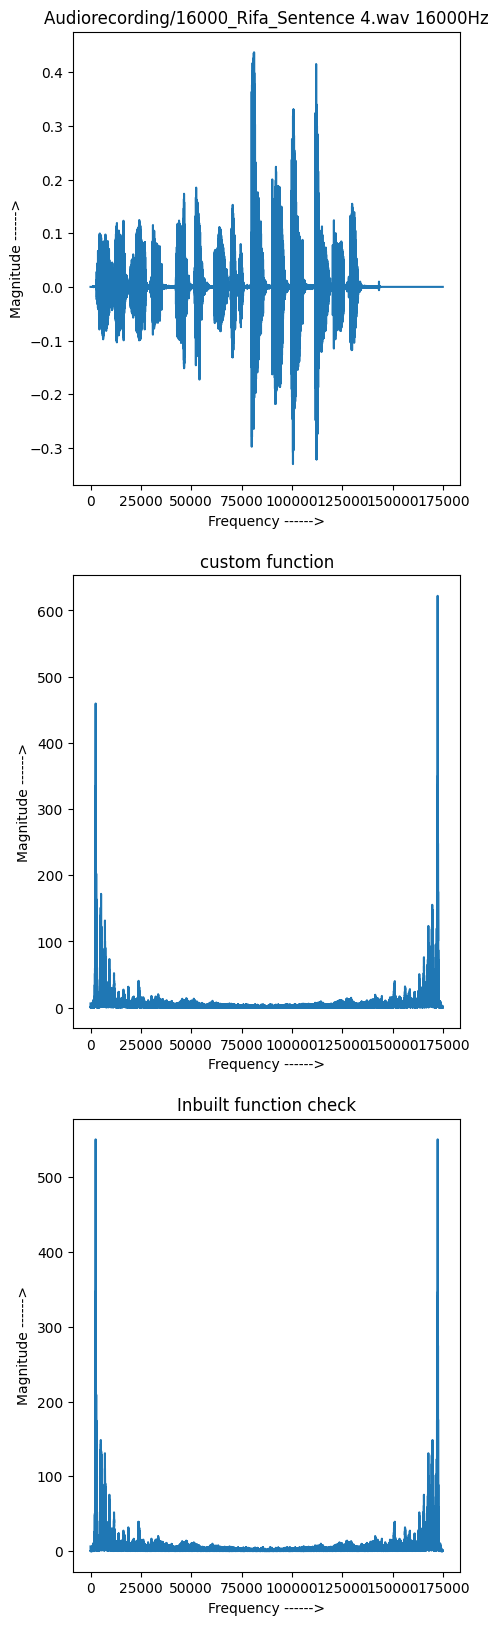

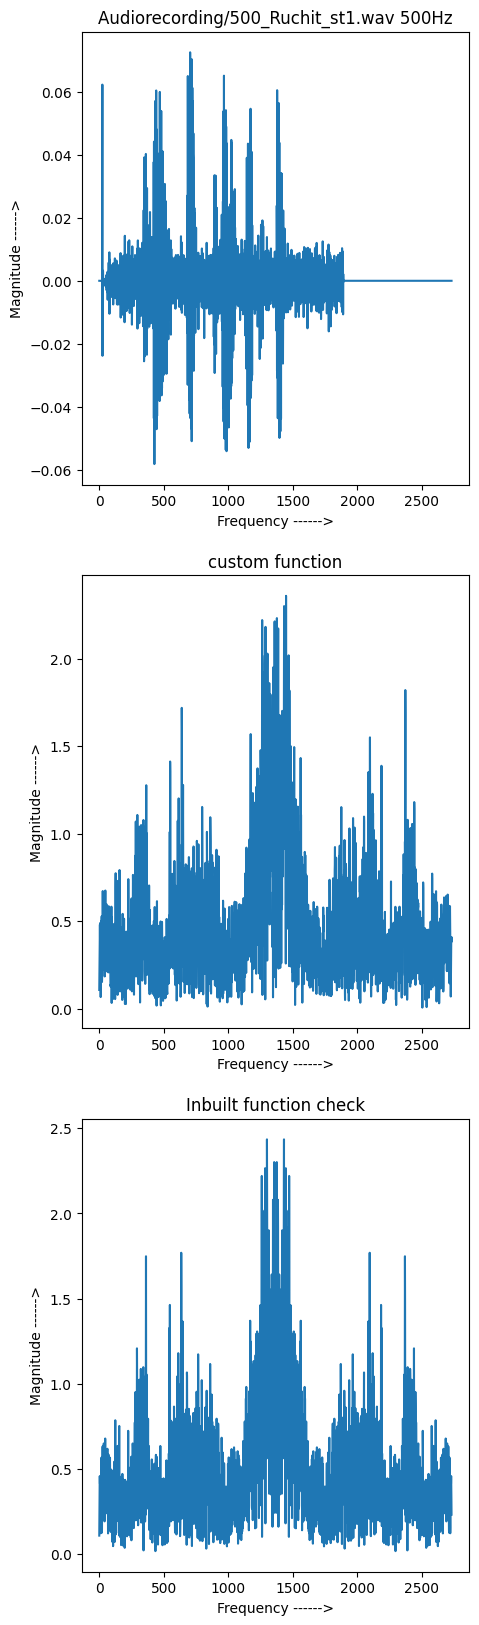

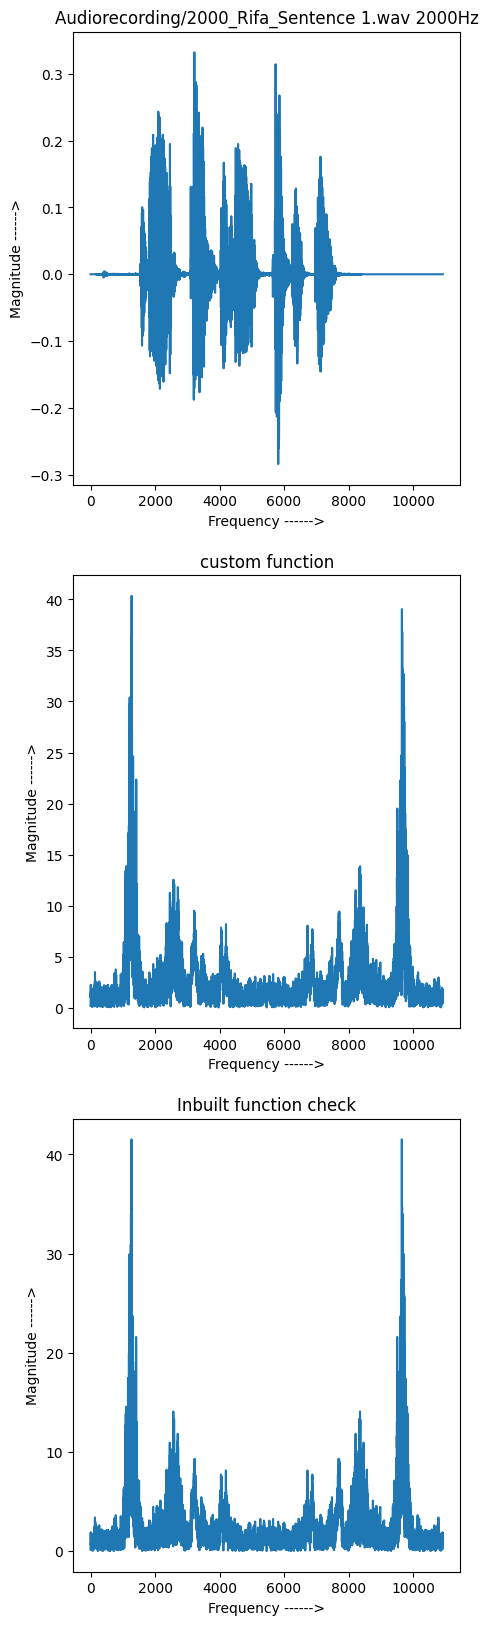

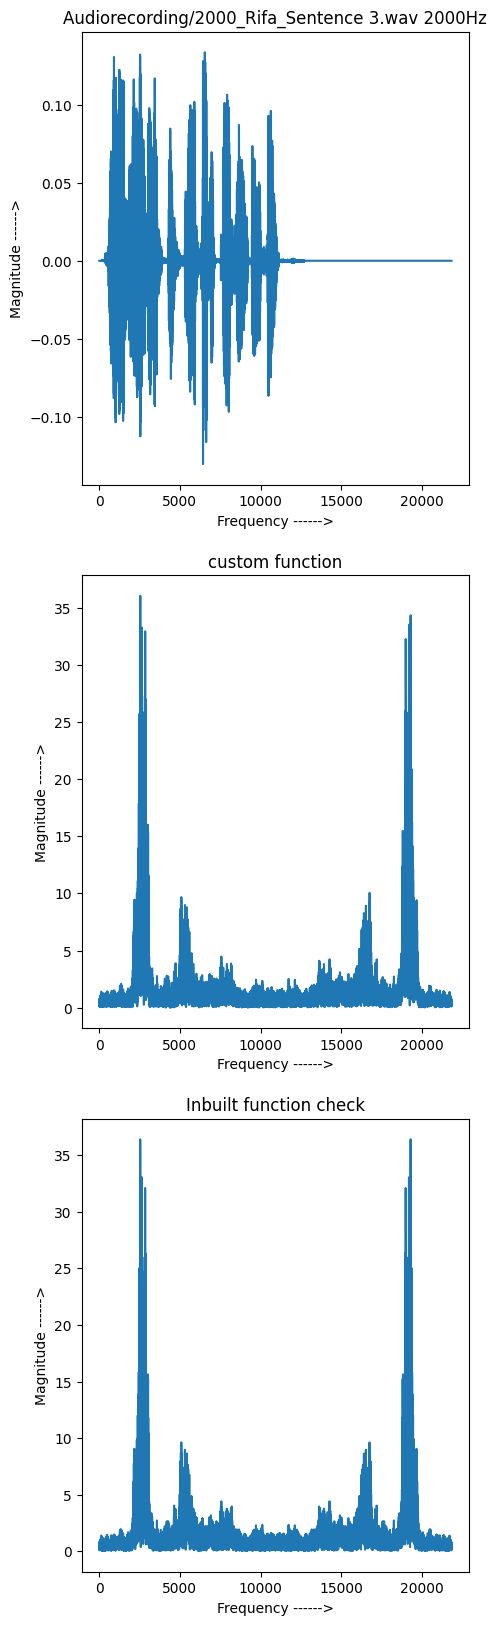

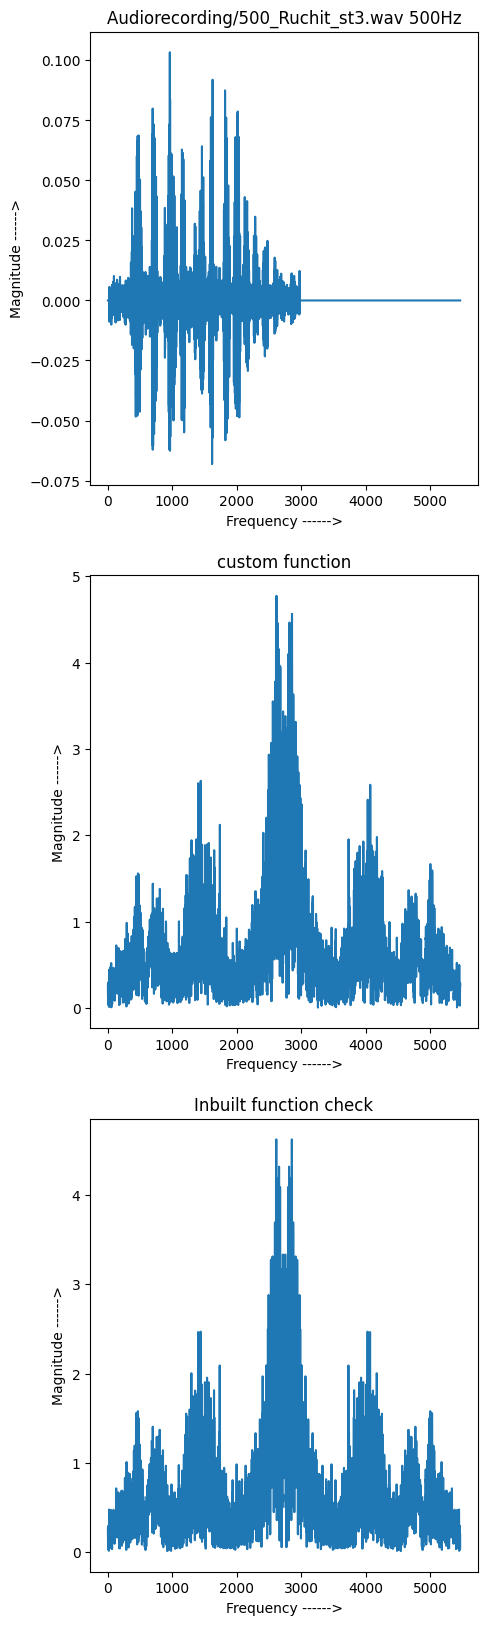

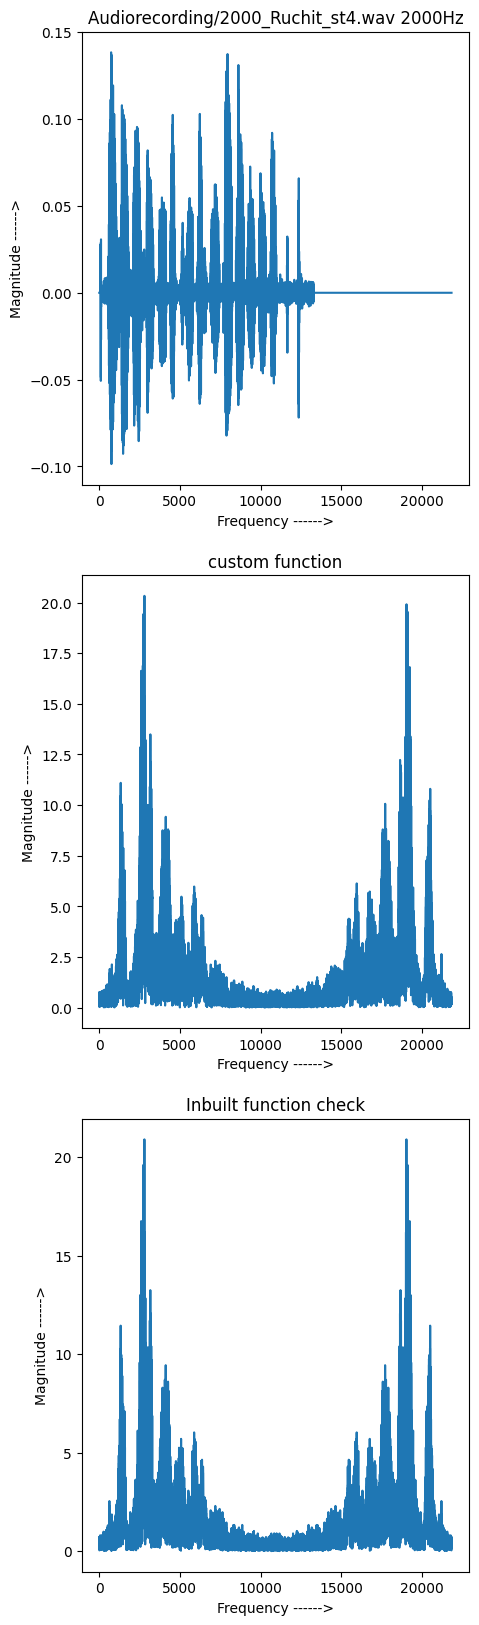

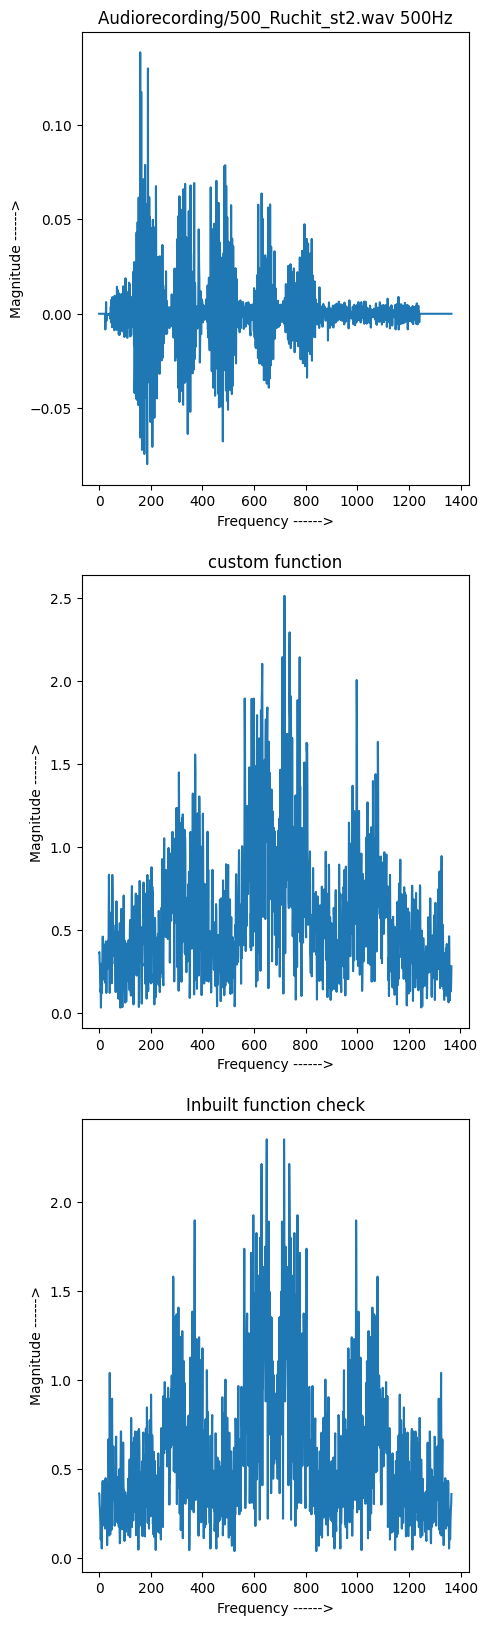

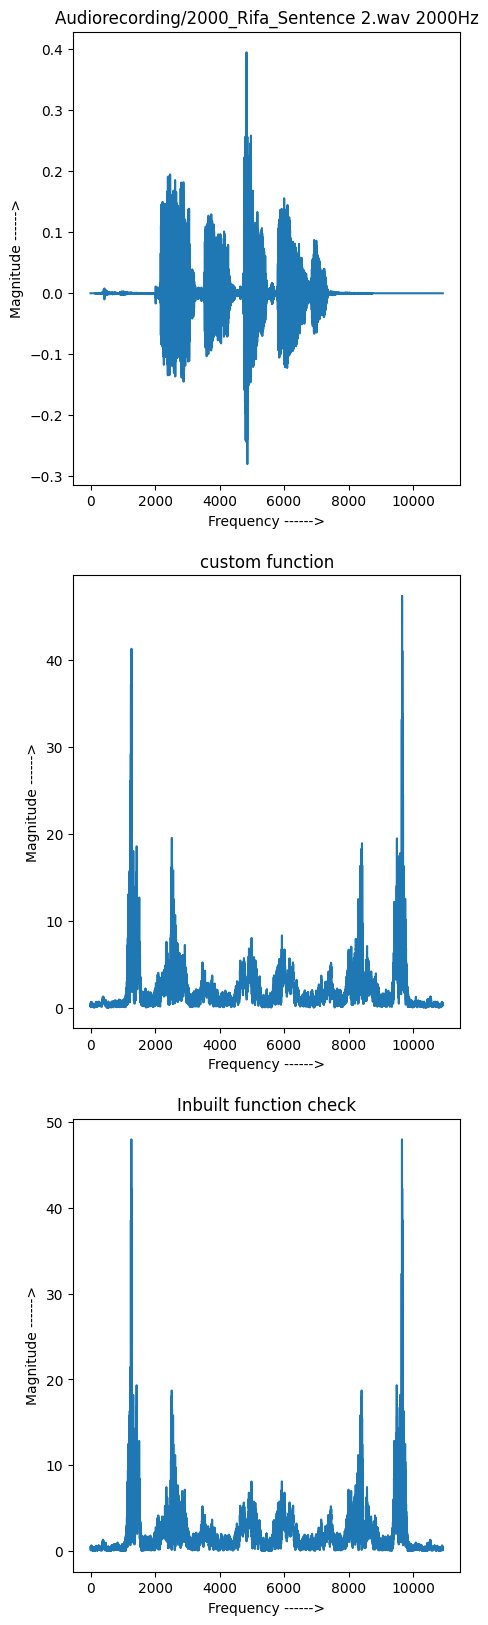

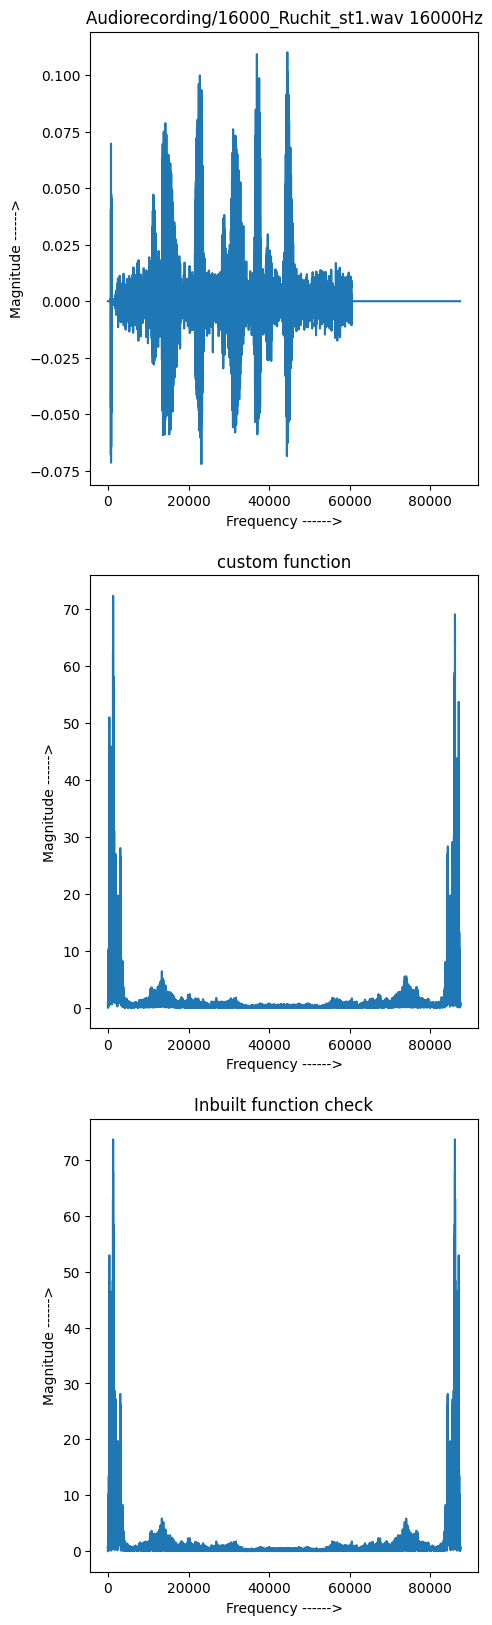

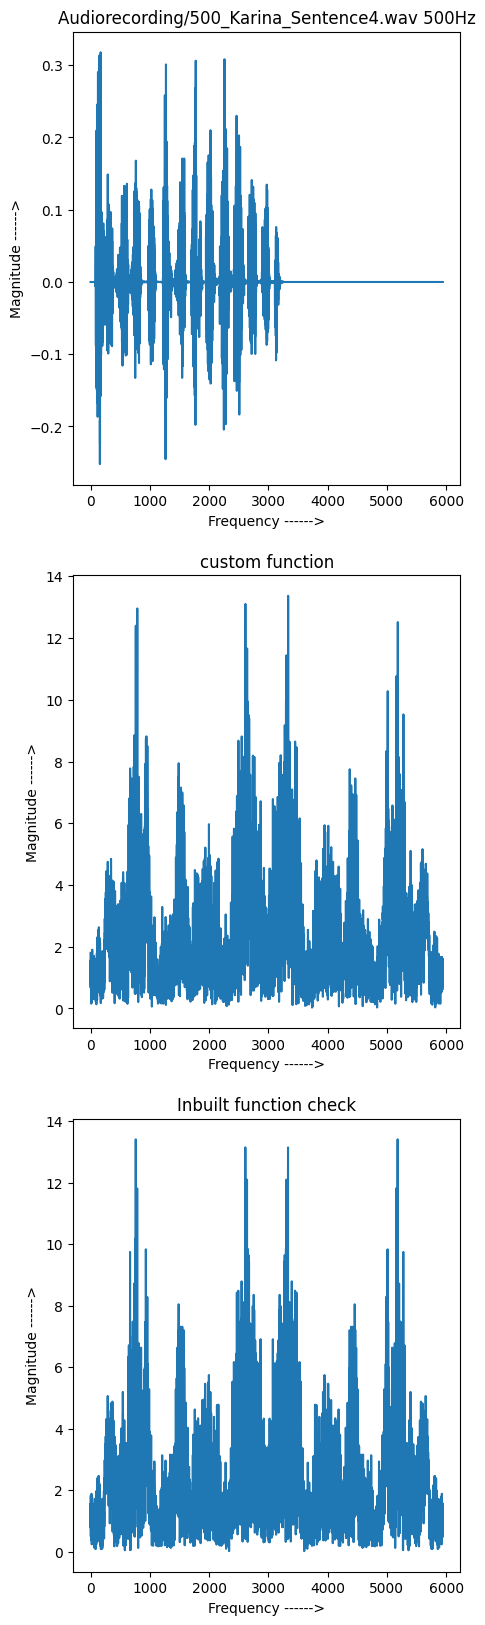

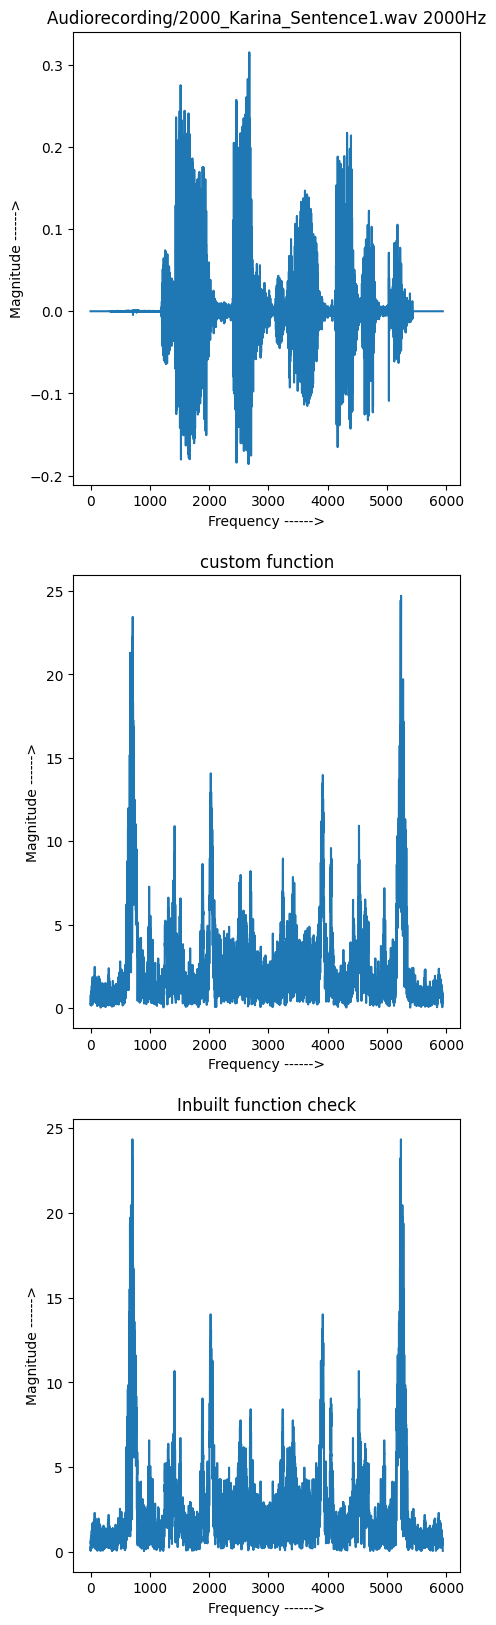

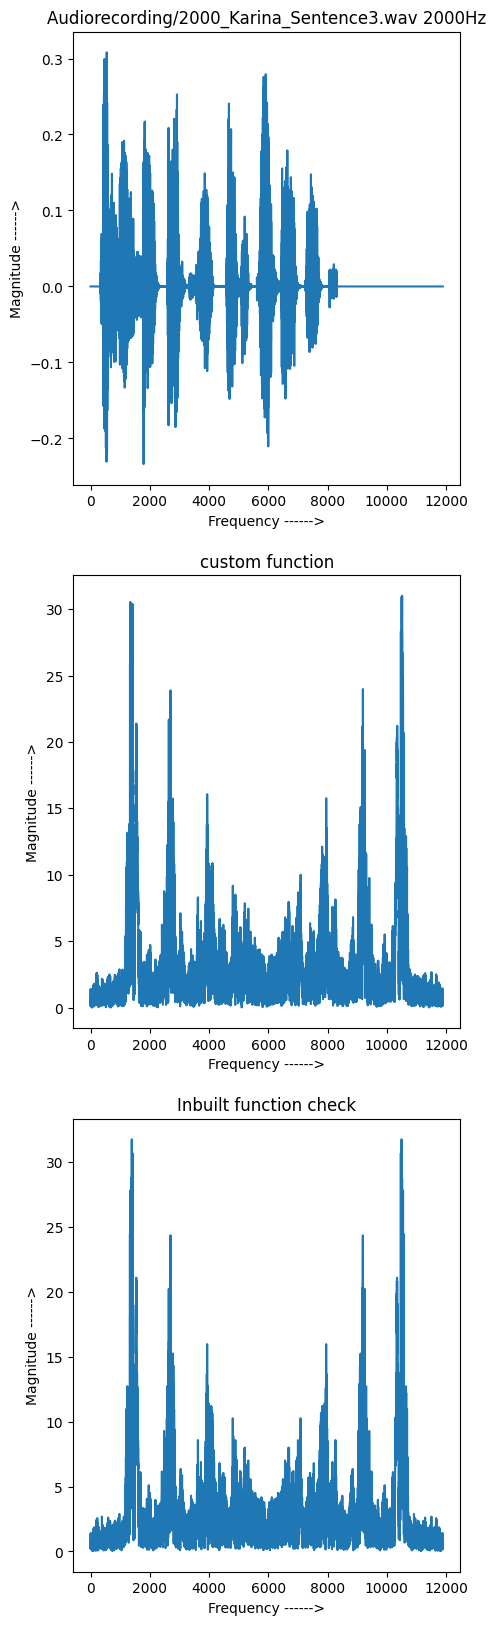

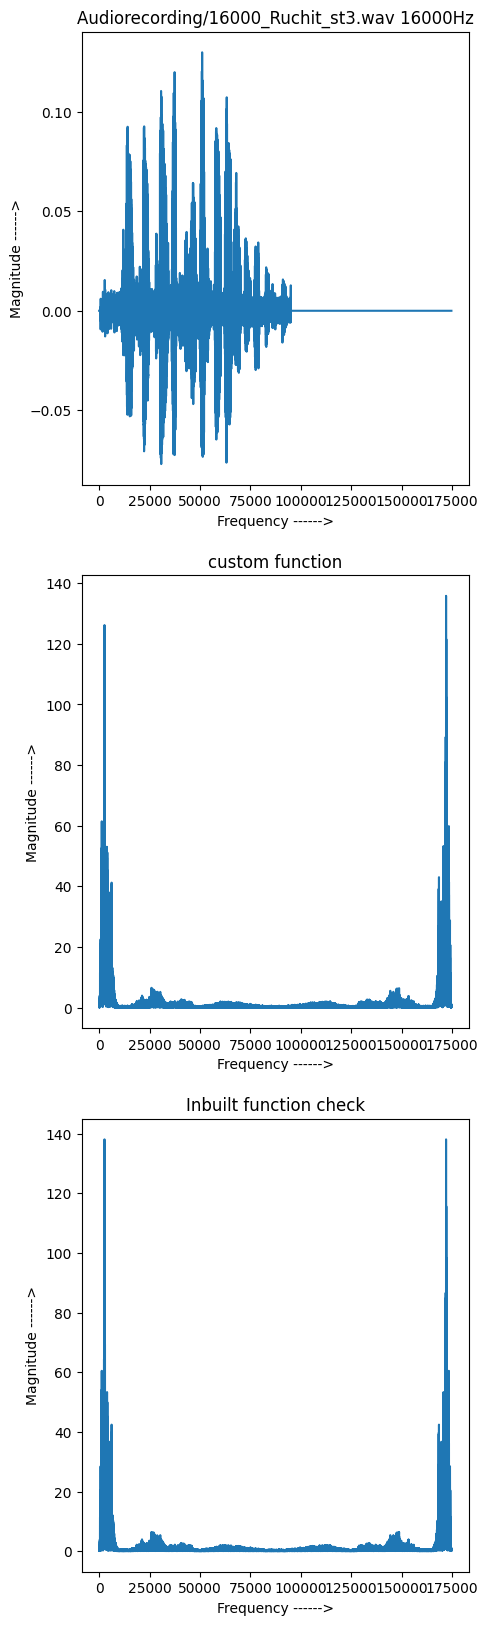

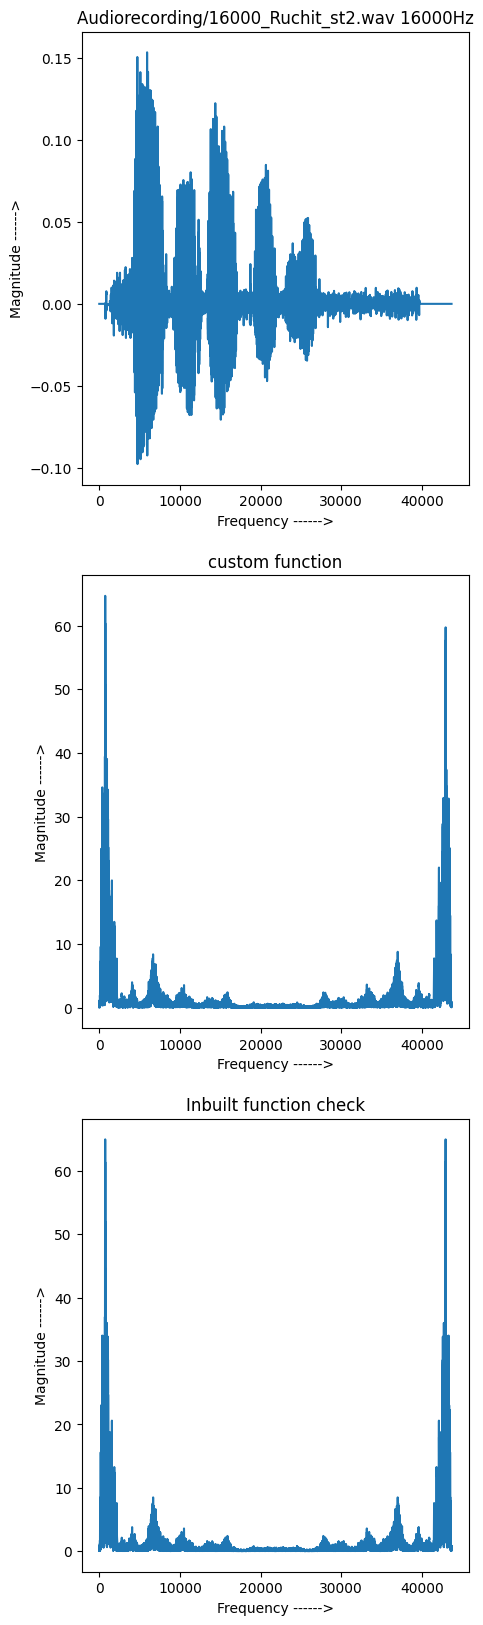

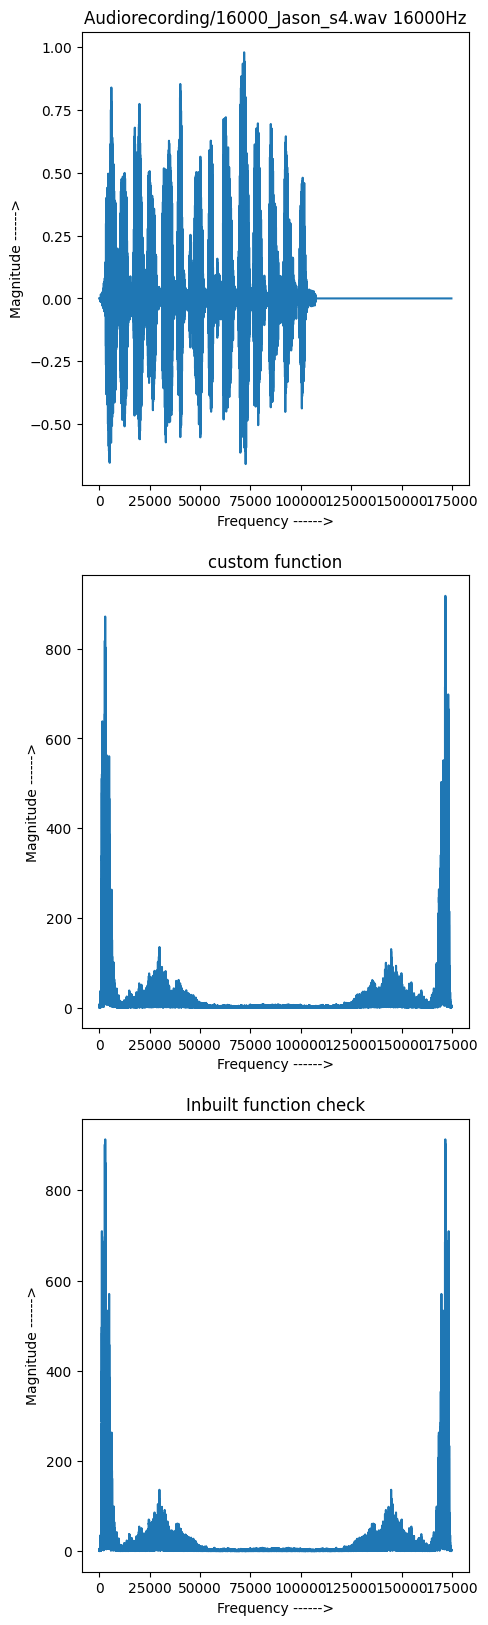

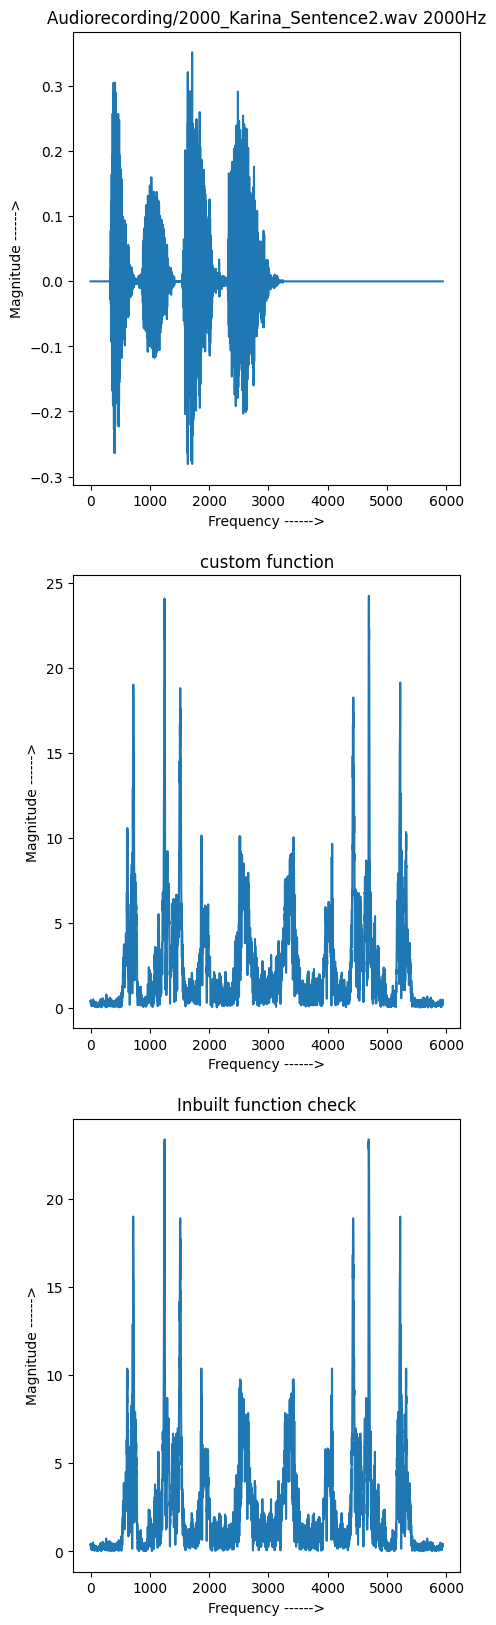

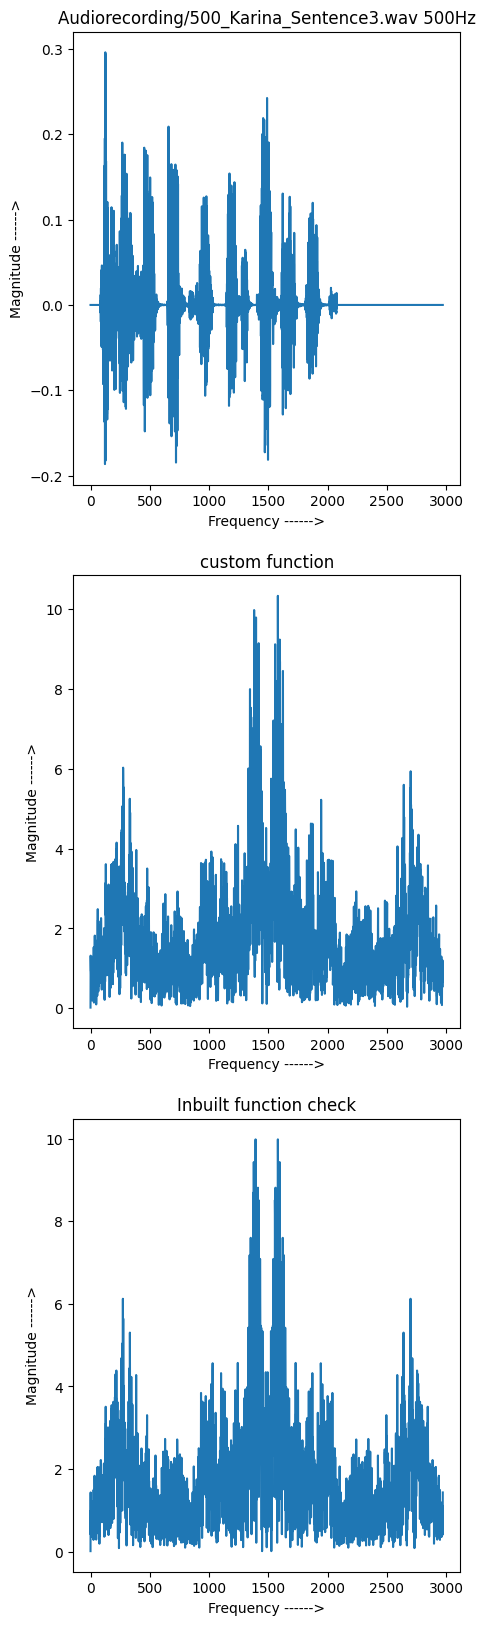

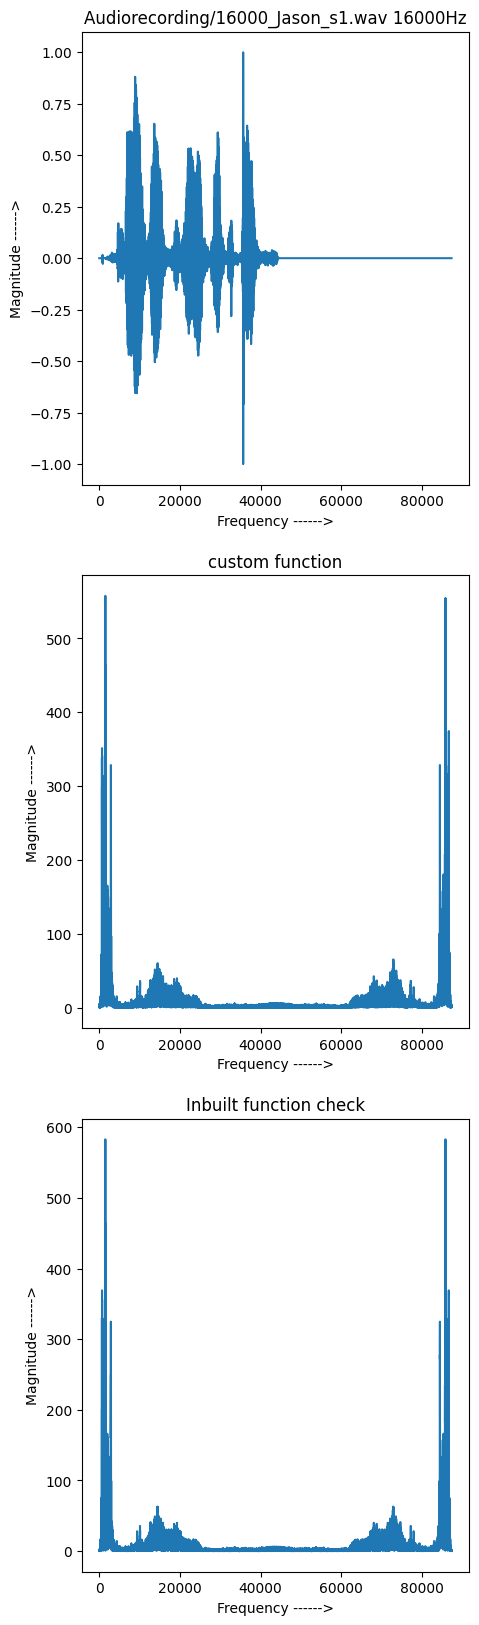

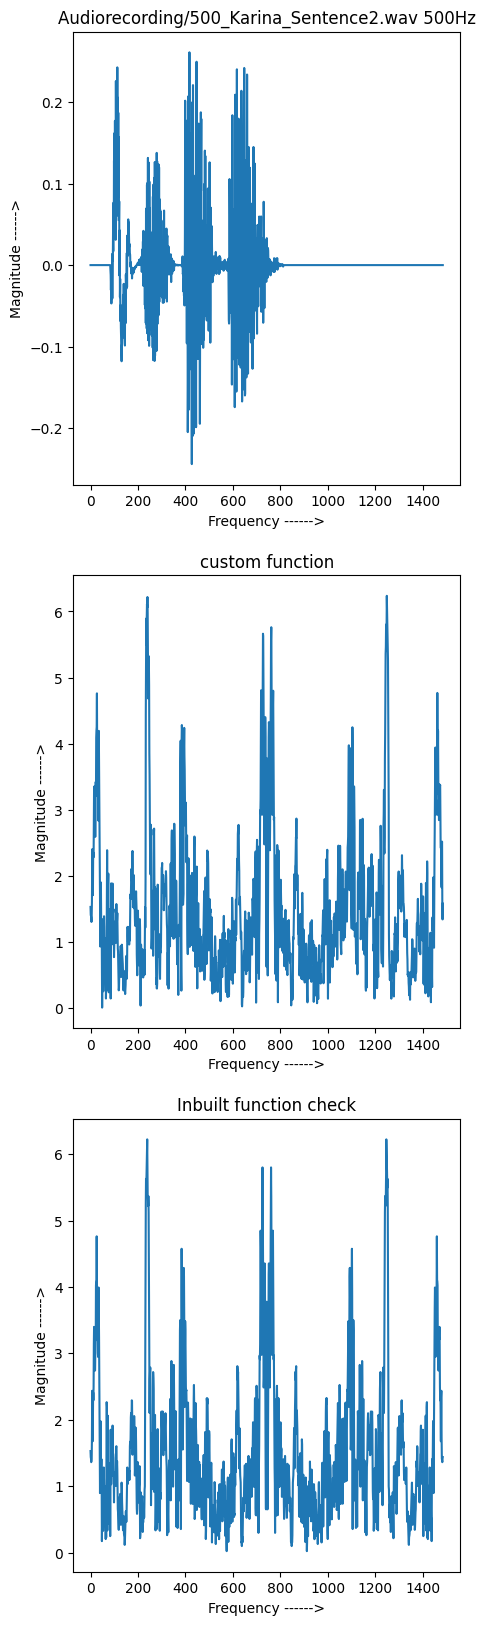

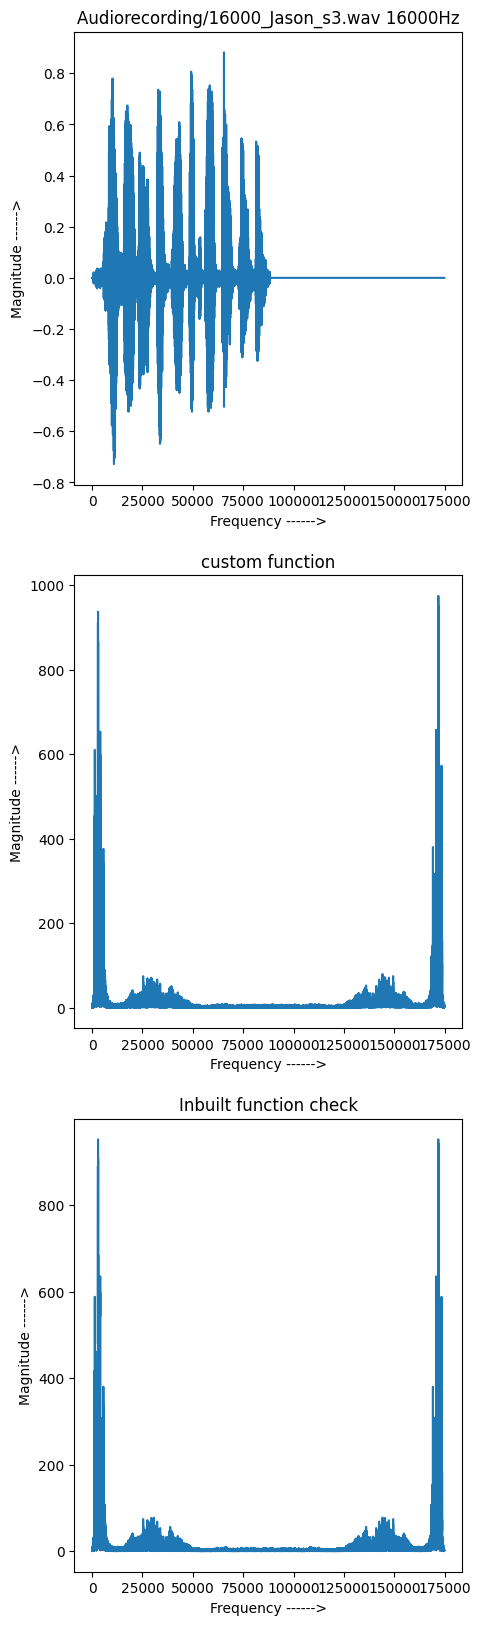

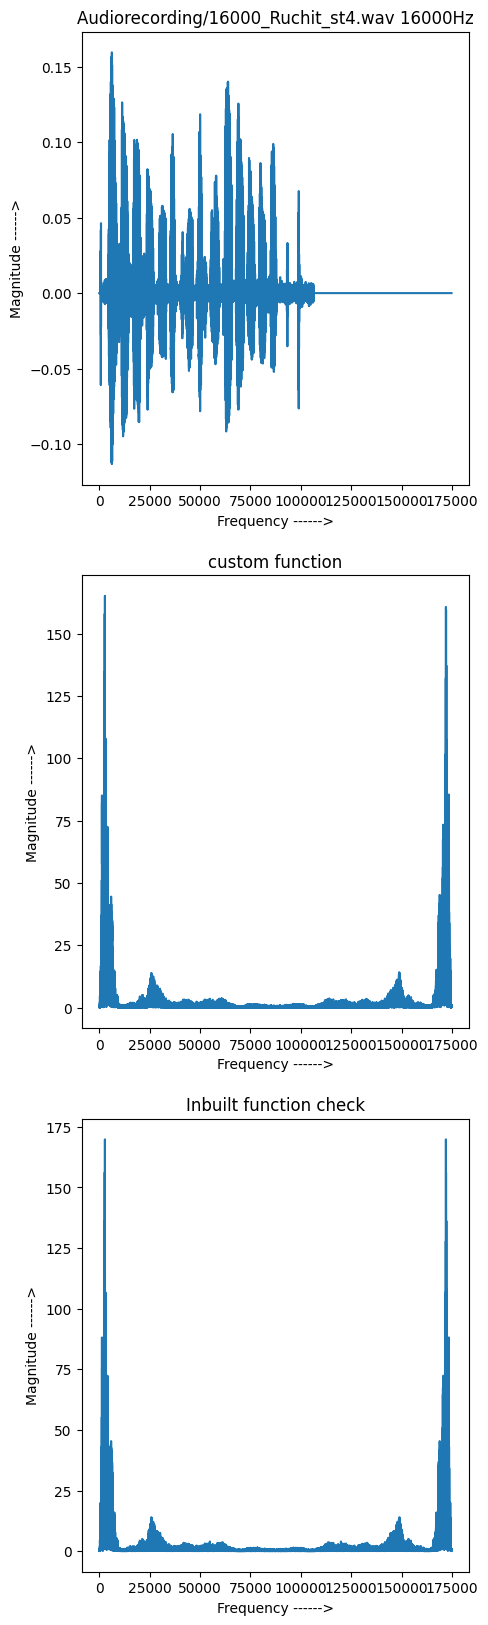

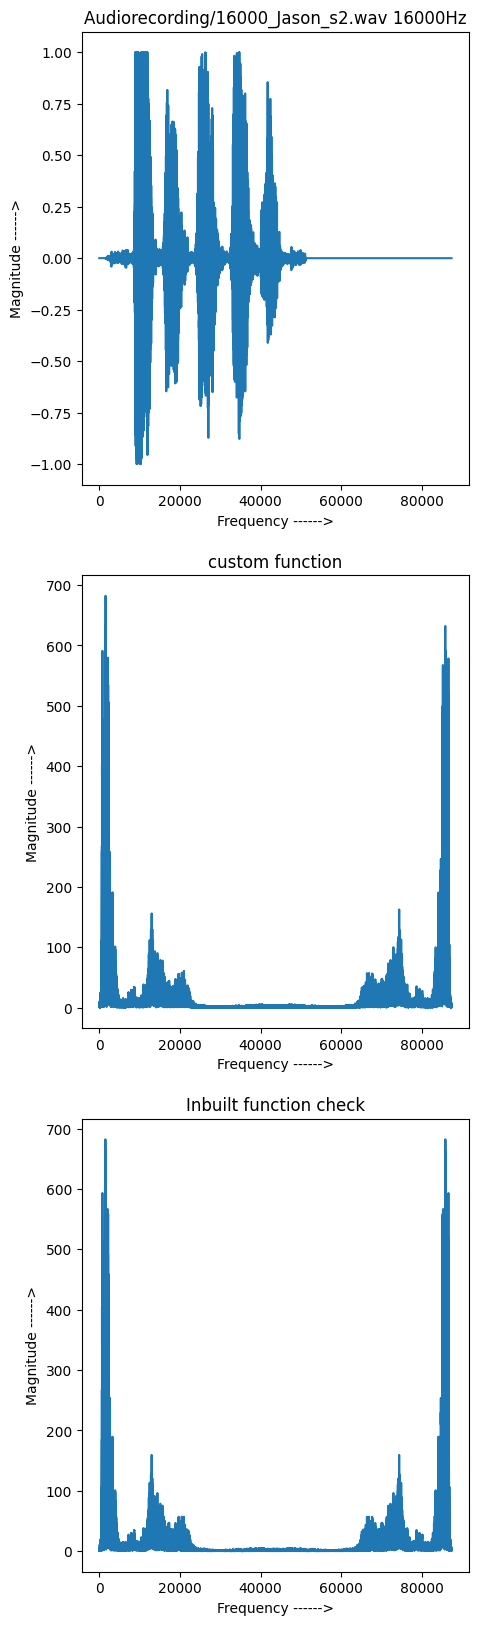

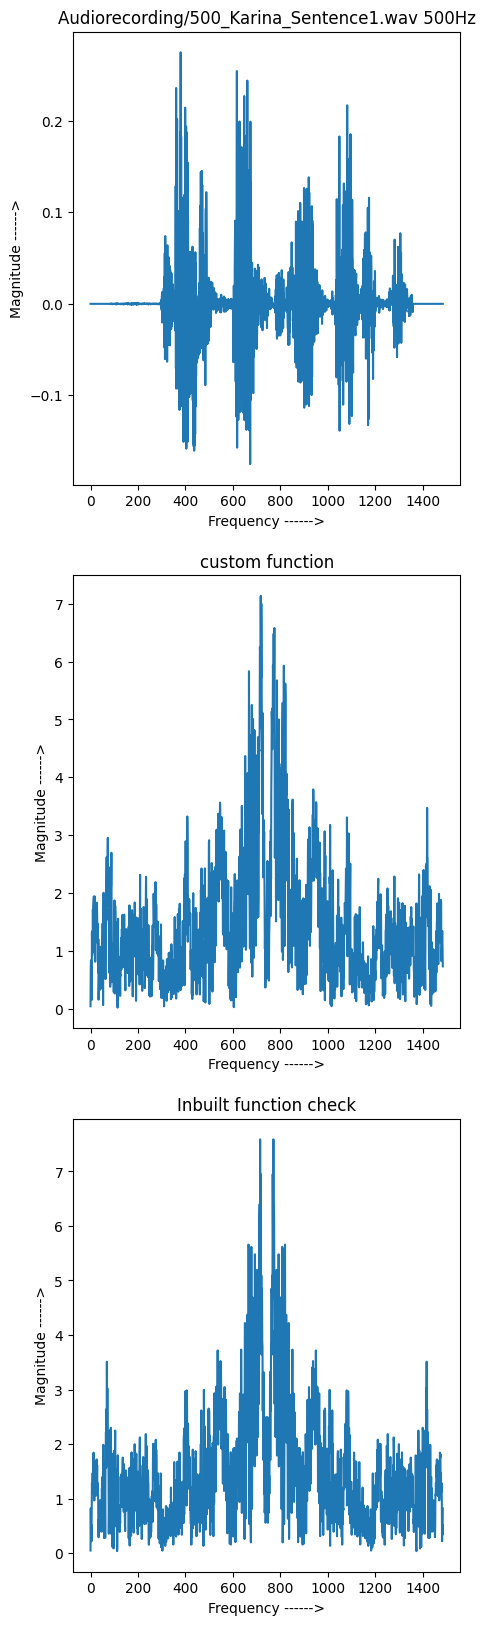

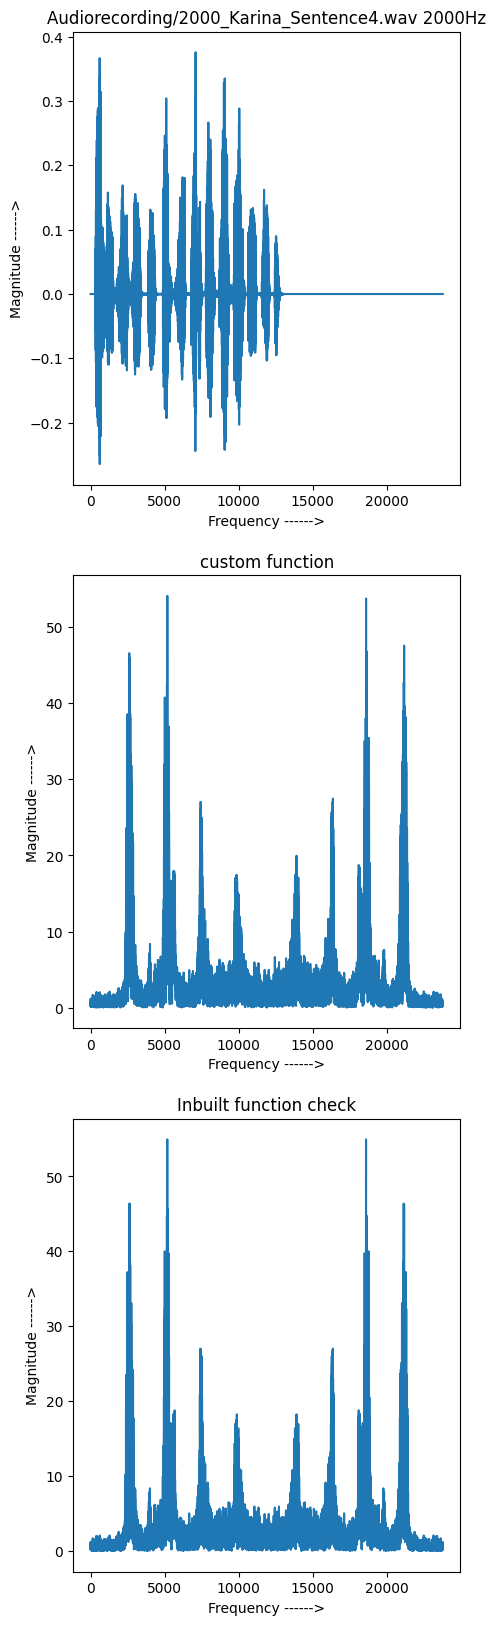

In [9]:
# Calculating the fft using custom function, inbuilt function, plotting side by side 
# and comparing the results
for i in file_path:
    samples, sampling_rate = librosa.load(i,sr=None,mono=True, offset = 0.0, duration = None)
    duration = len(samples)/sampling_rate
    # print(duration)
    plt.figure(figsize = (5,20))
    plt.subplot(3,1,1)
    
    plt.title(i + " " + str(sampling_rate) + "Hz")
    # librosa.display.waveshow(y = samples, sr = sampling_rate)
    plt.plot(samples)
    plt.xlabel("Frequency ------>")
    plt.ylabel("Magnitude ------>")
    # plt.show()
    
    plt.subplot(3,1,2)
    x = np.abs(dft(samples))
    # librosa.display.waveshow(y=x, sr = sampling_rate)
    plt.plot(x)
    plt.title("custom function")
    plt.xlabel("Frequency ------>")
    plt.ylabel("Magnitude ------>")
    # plt.show()
    
    plt.subplot(3,1,3)
    z = abs(fft.fft(samples))
    plt.title("Inbuilt function check")
    # librosa.display.waveshow(y = z, sr = sampling_rate)
    plt.plot(z)
    plt.xlabel("Frequency ------>")
    plt.ylabel("Magnitude ------>")
    
    
    plt.show()

# Denoising

In [10]:
# Using noicereduce library for denoising

def denoise(data, sr):
    # perform noise reduction 
    reduced_noise = nr.reduce_noise(y=data,sr=sr, time_mask_smooth_ms=512)
    return reduced_noise

500 [0 0 0 ... 0 0 0]


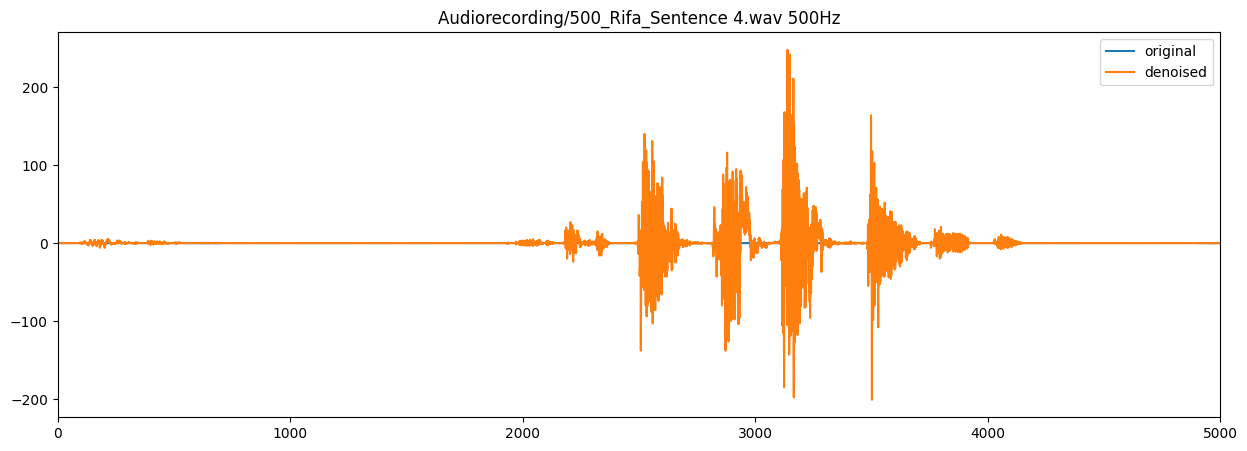

16000 [0 0 0 ... 0 0 0]


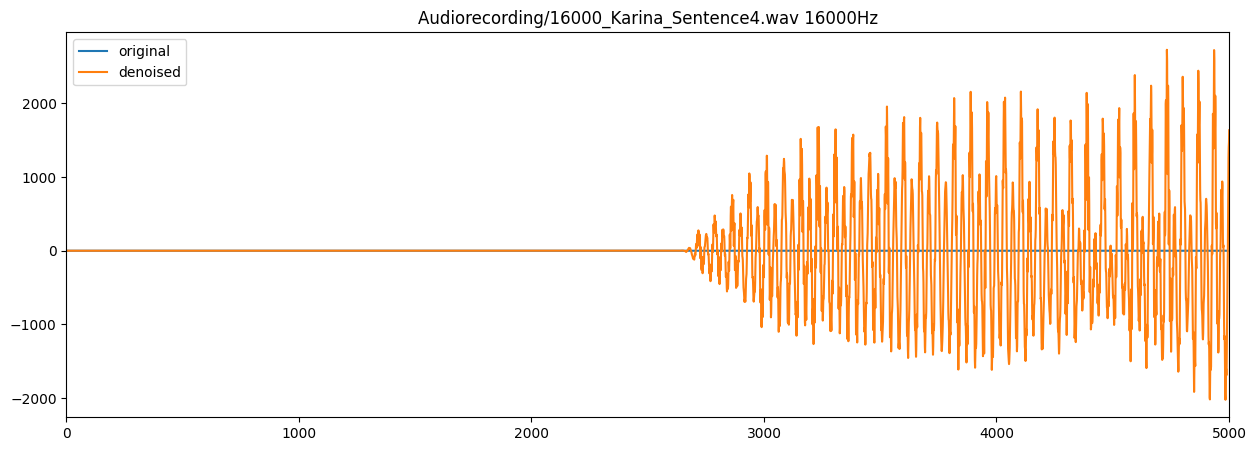

2000 [0 0 0 ... 0 0 0]


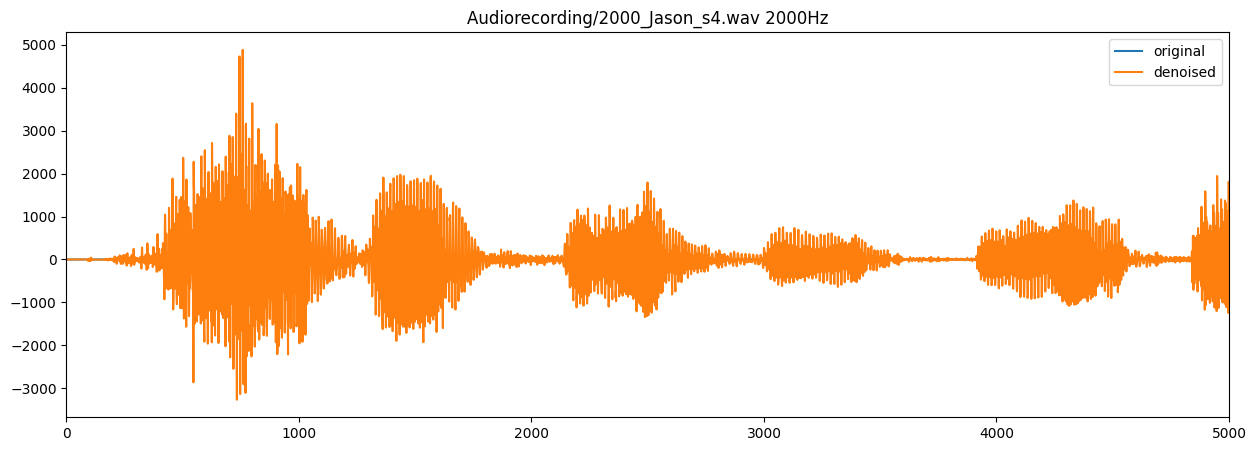

500 [0 0 0 ... 0 0 0]


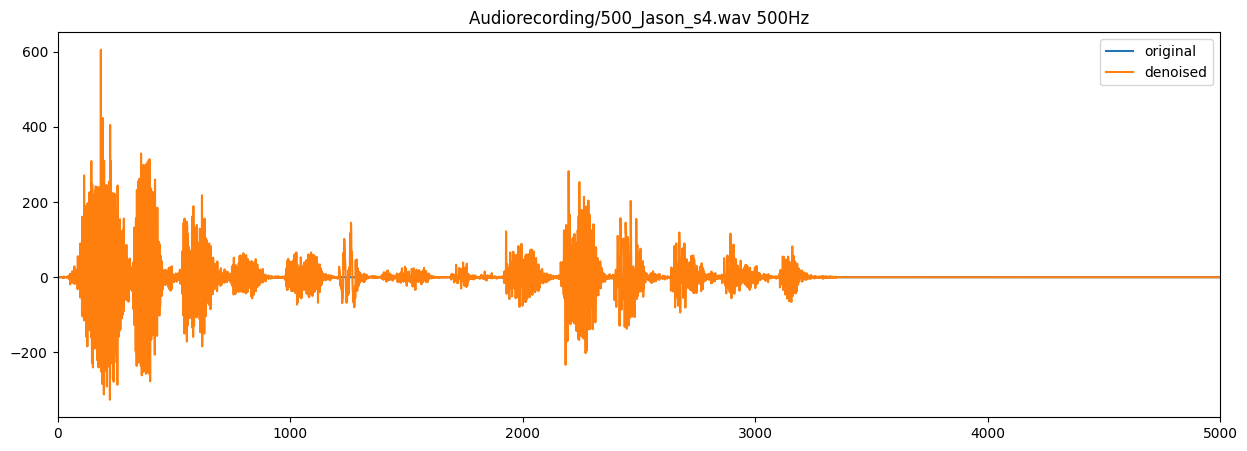

500 [0 0 0 ... 0 0 0]


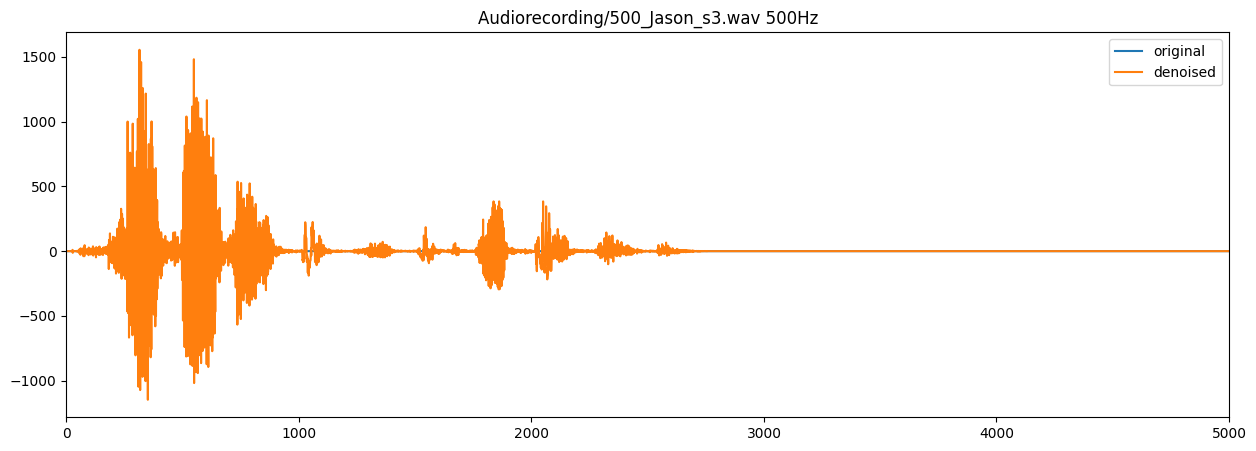

16000 [0 0 0 ... 0 0 0]


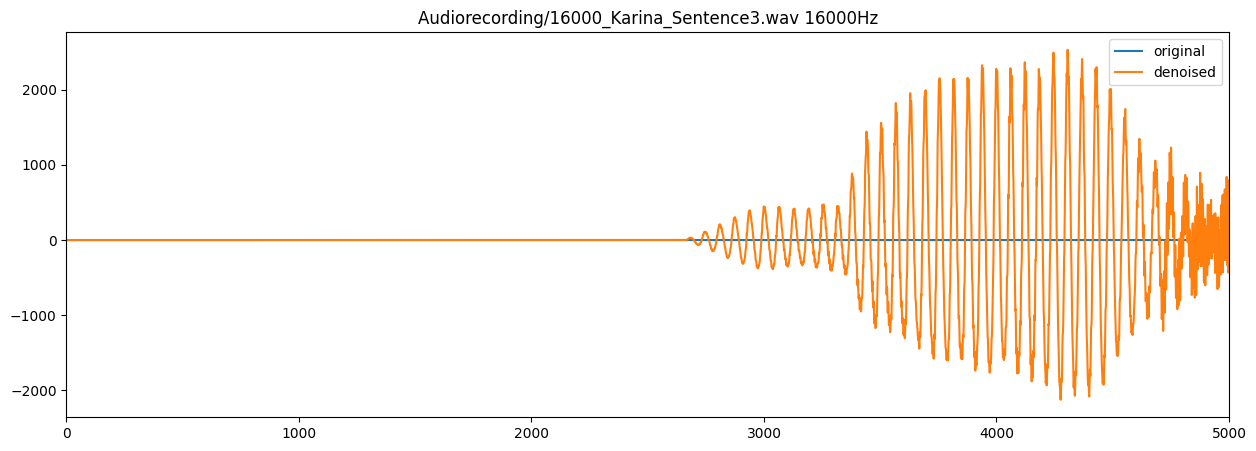

2000 [0 0 0 ... 0 0 0]


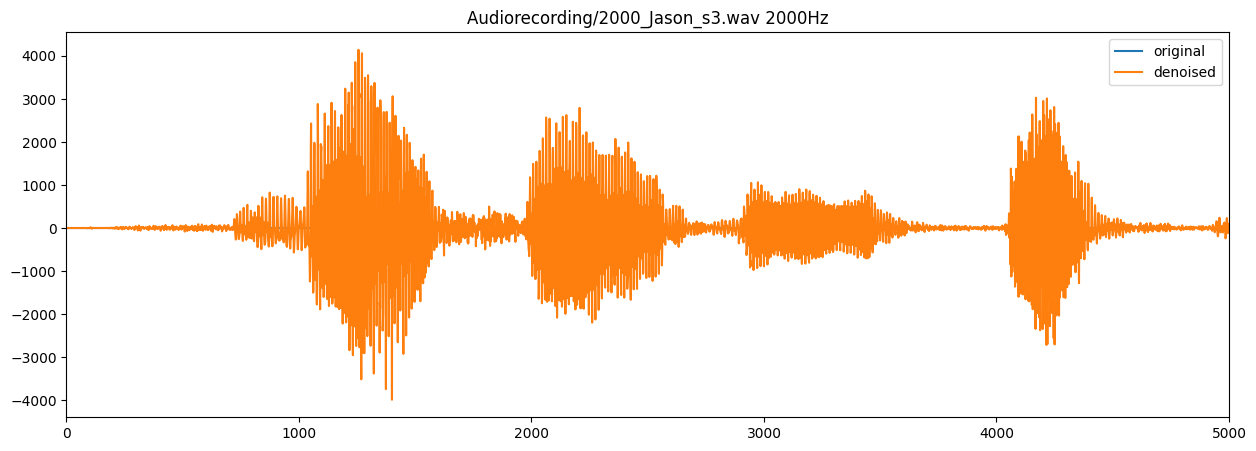

500 [0 0 0 ... 0 0 0]


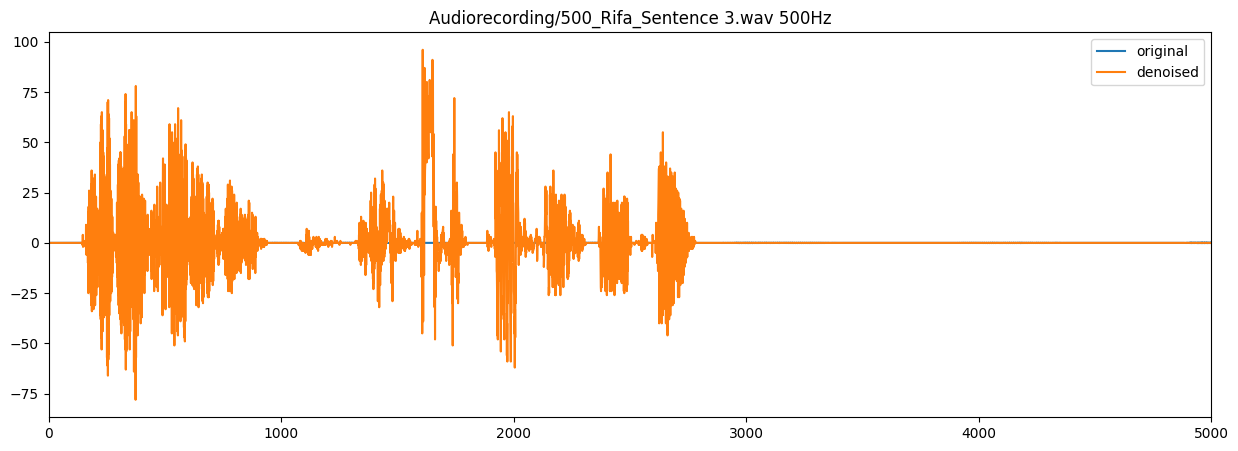

500 [0 0 0 ... 0 0 0]


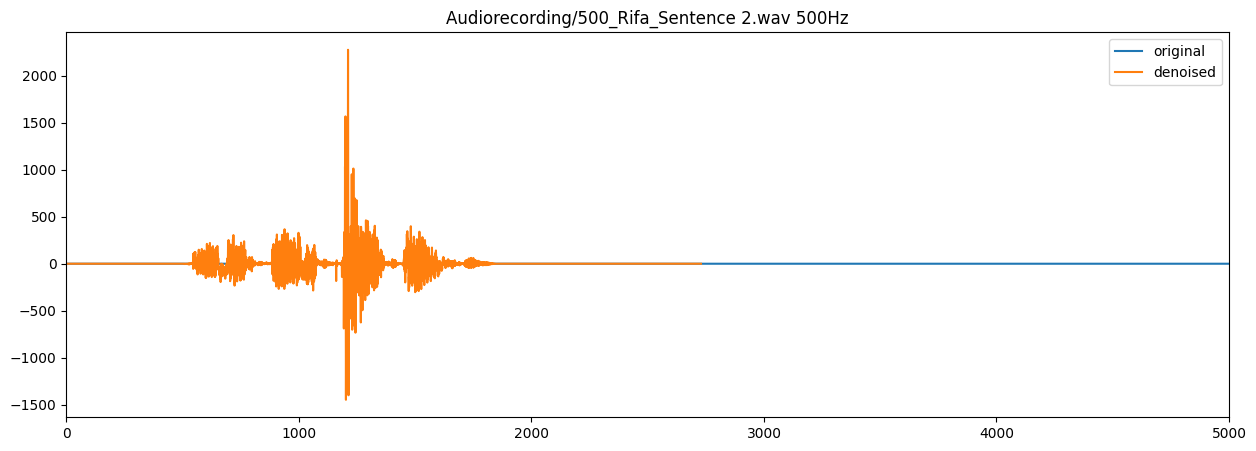

2000 [0 0 0 ... 0 0 0]


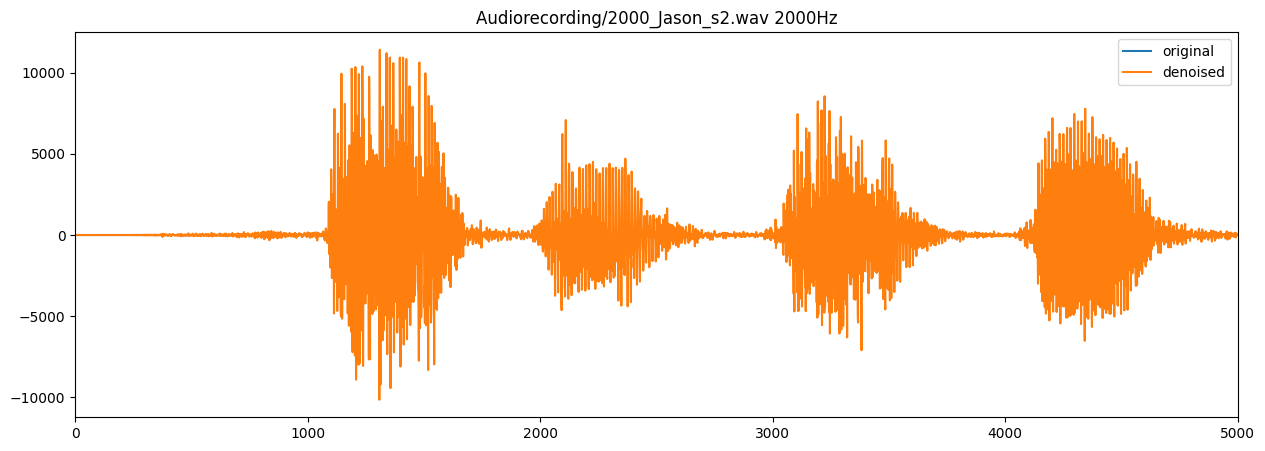

16000 [0 0 0 ... 0 0 0]


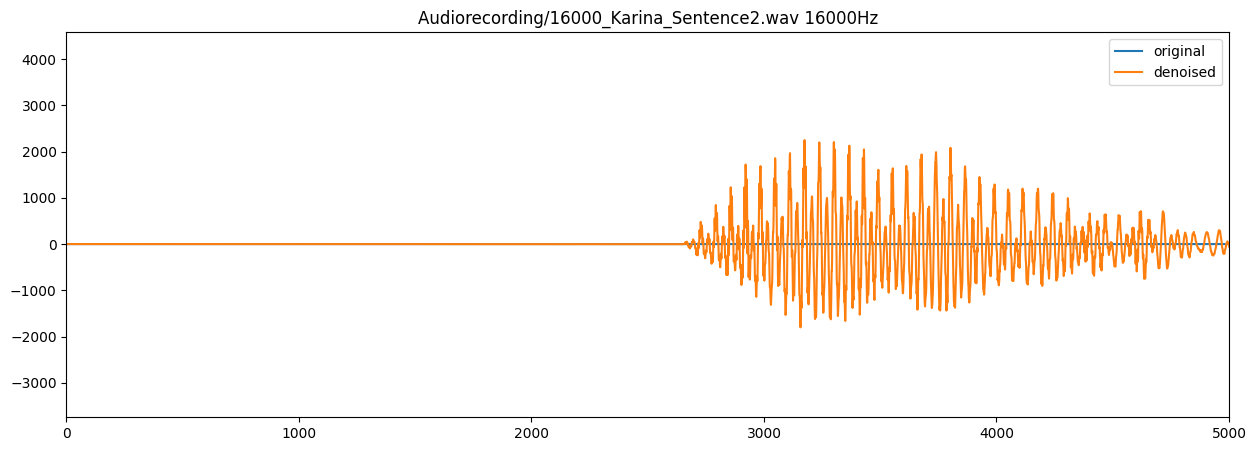

500 [0 0 0 ... 0 0 0]


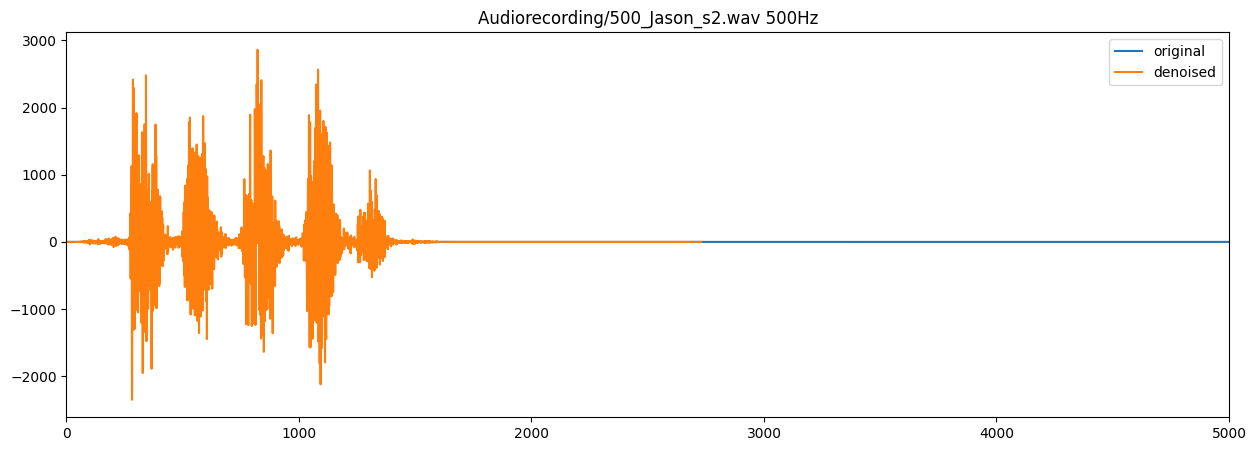

500 [0 0 0 ... 0 0 0]


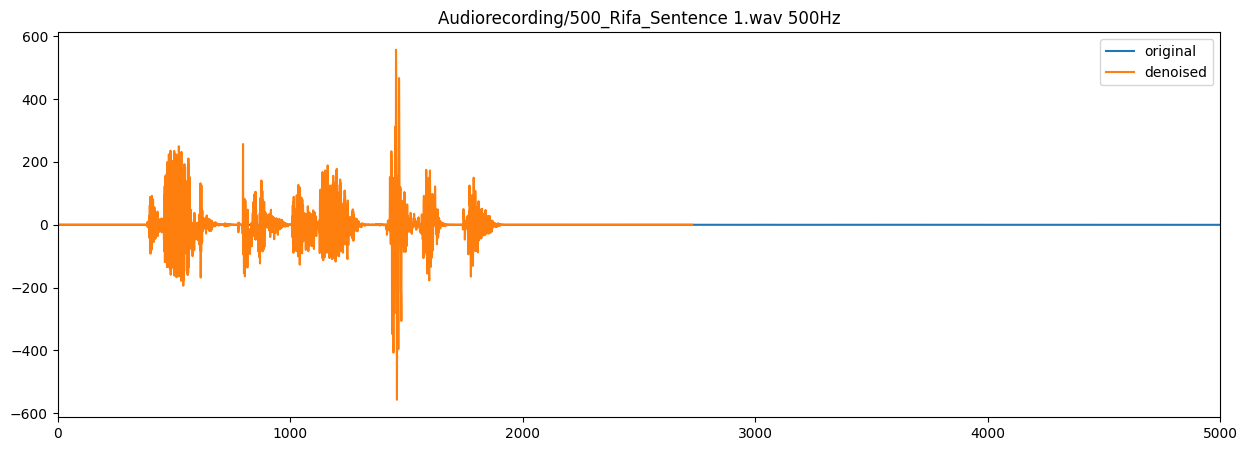

2000 [0 0 0 ... 0 0 0]


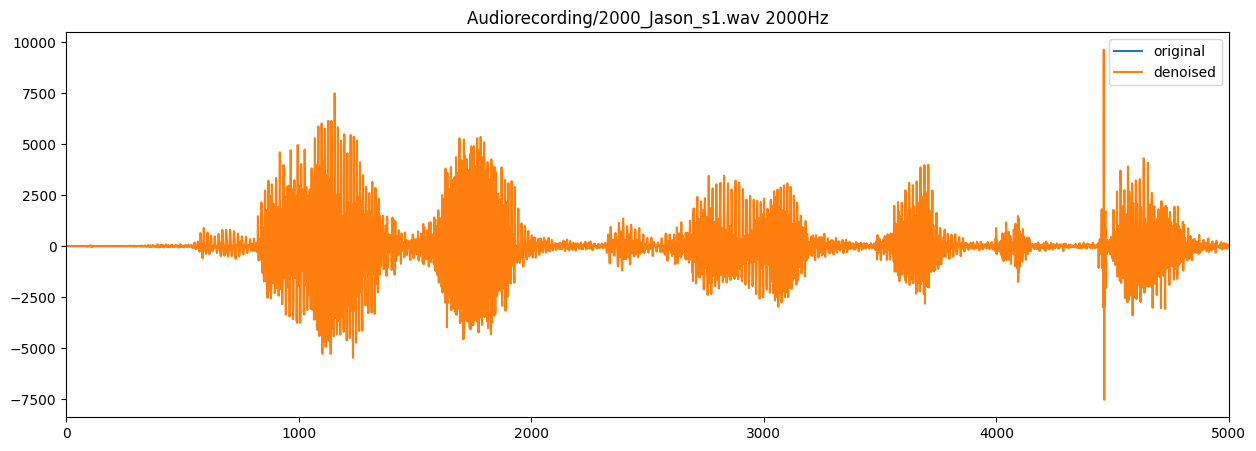

16000 [0 0 0 ... 0 0 0]


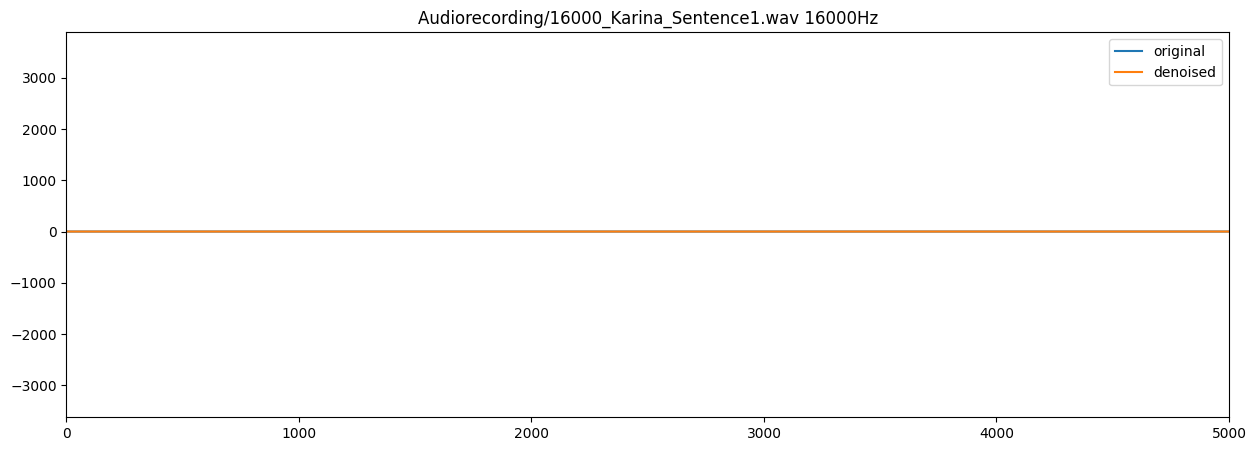

500 [0 0 0 ... 0 0 0]


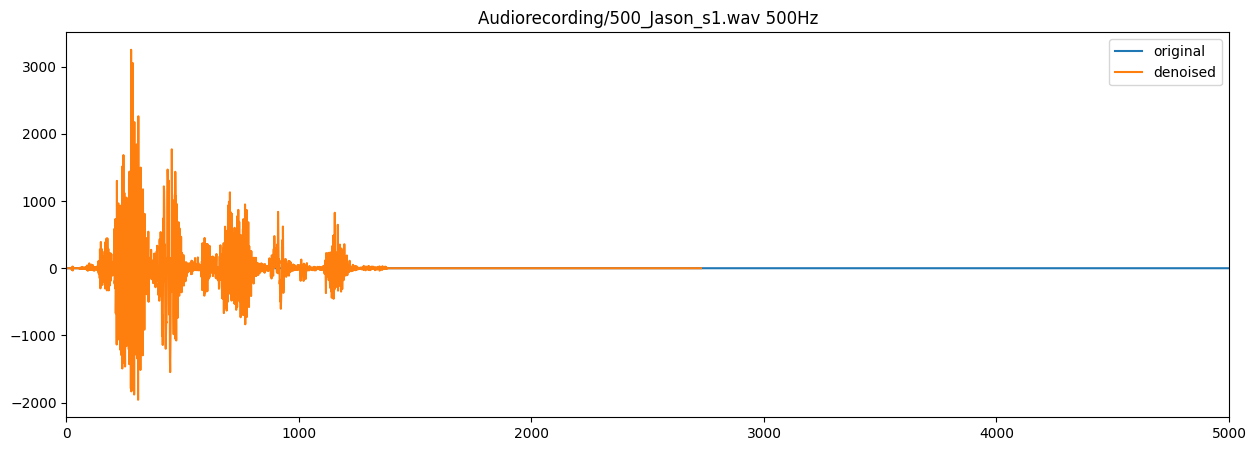

16000 [0 0 0 ... 0 0 0]


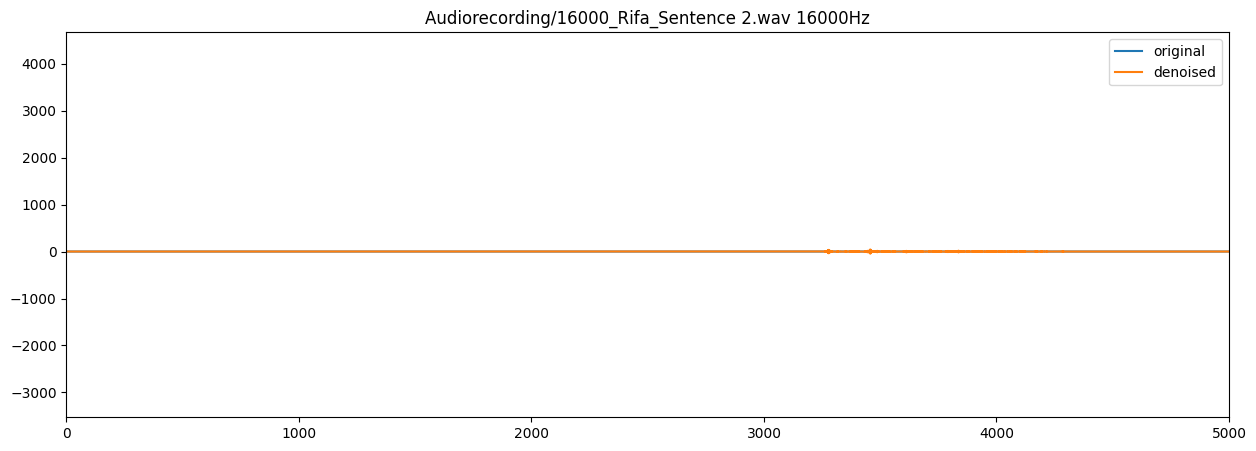

2000 [0 0 0 ... 0 0 0]


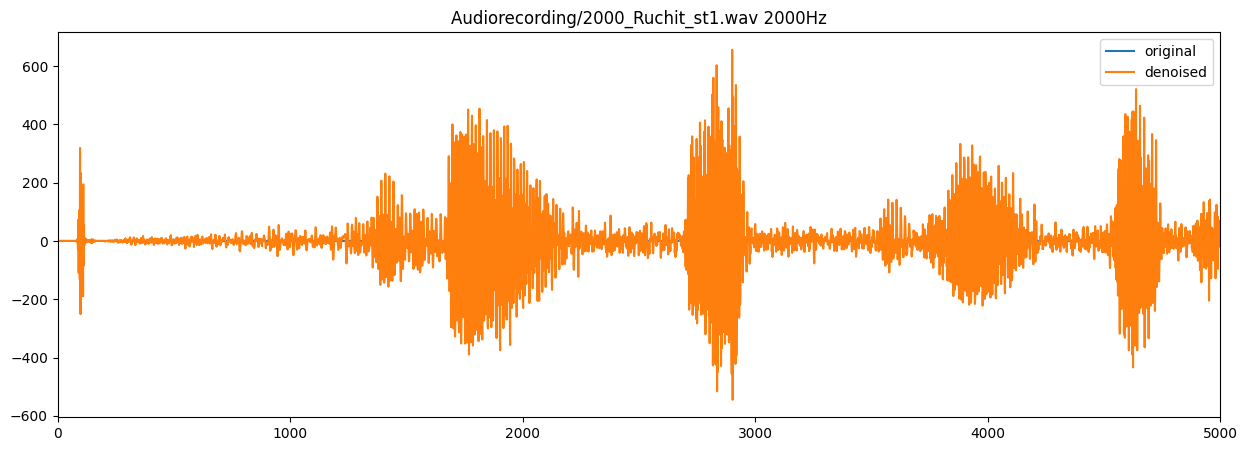

16000 [0 0 0 ... 0 0 0]


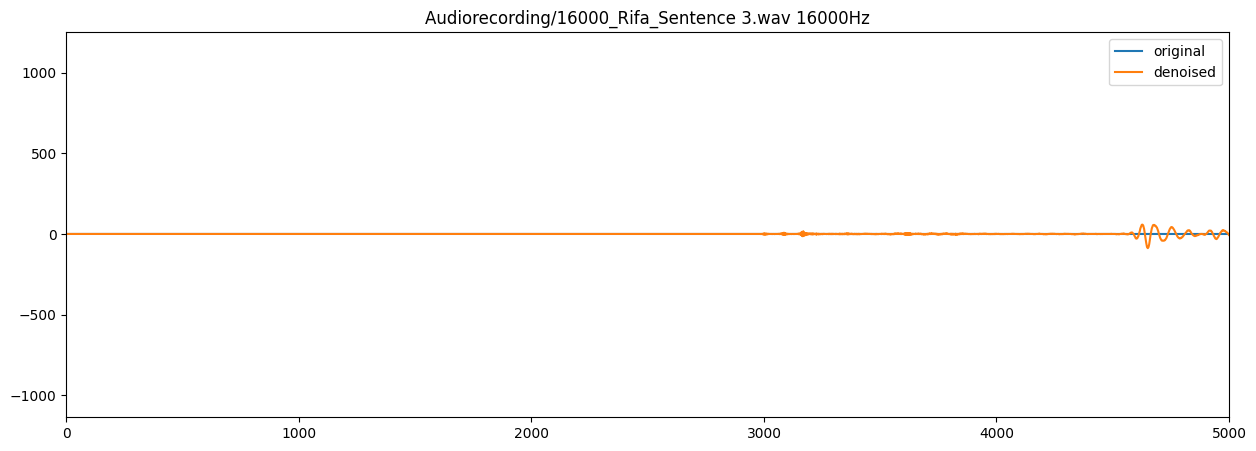

16000 [0 0 0 ... 0 0 0]


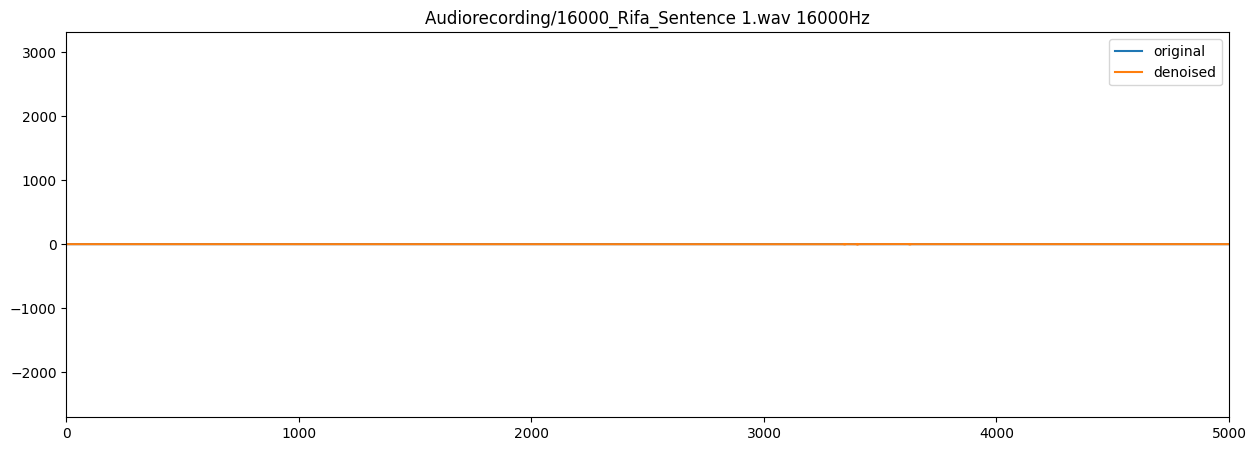

2000 [0 0 0 ... 0 0 0]


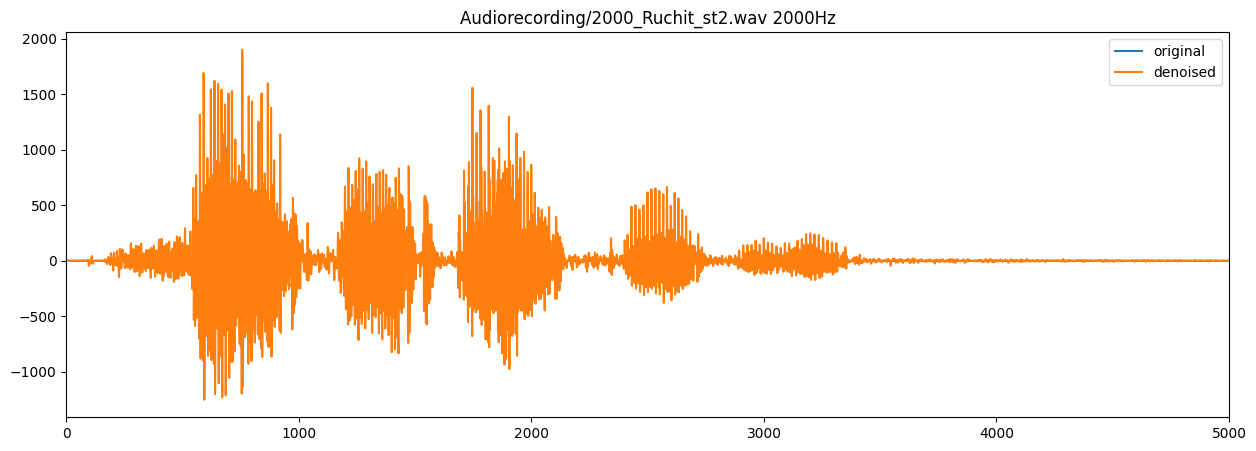

2000 [0 0 0 ... 0 0 0]


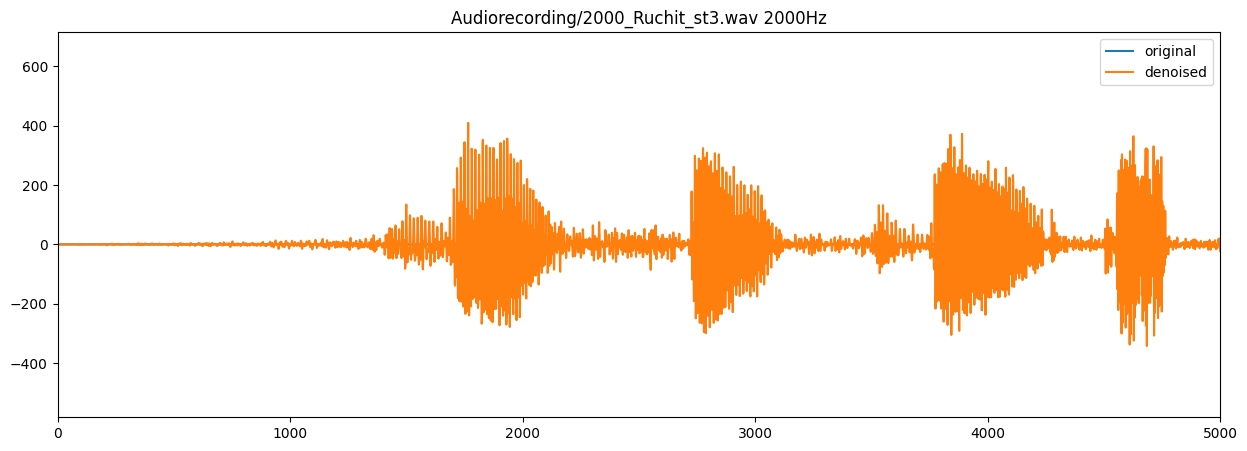

2000 [0 0 0 ... 0 0 0]


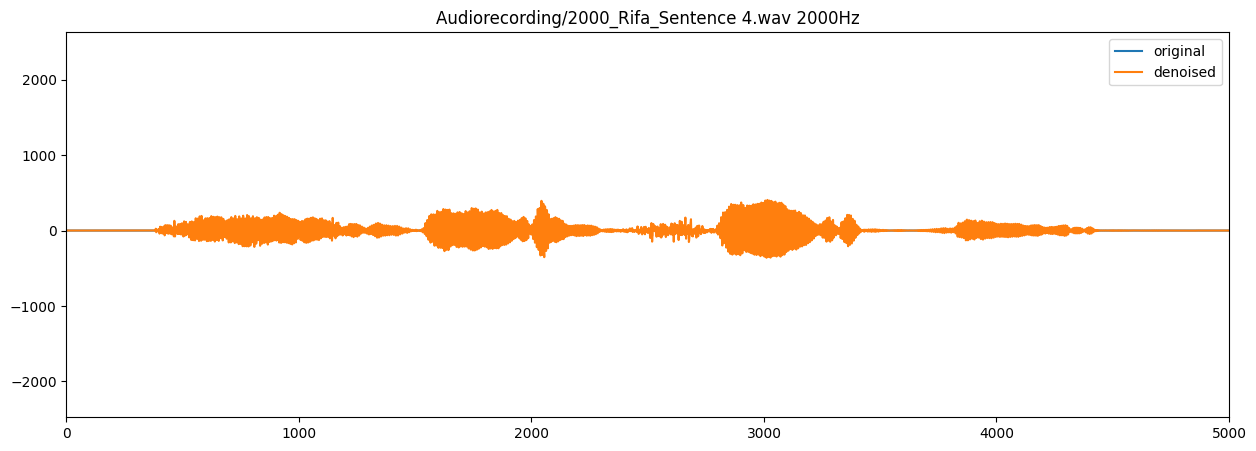

500 [0 0 0 ... 0 0 0]


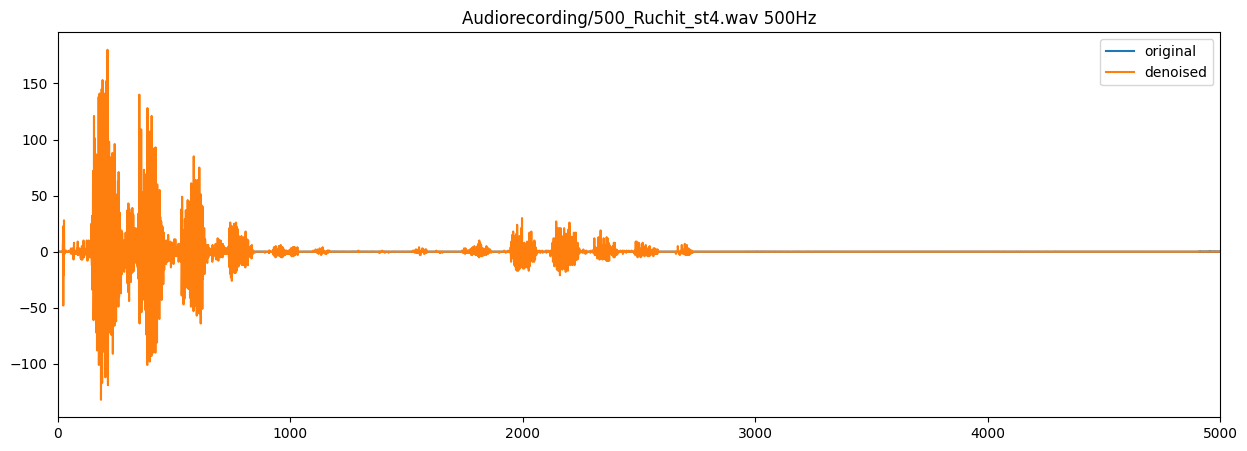

16000 [0 0 0 ... 0 0 0]


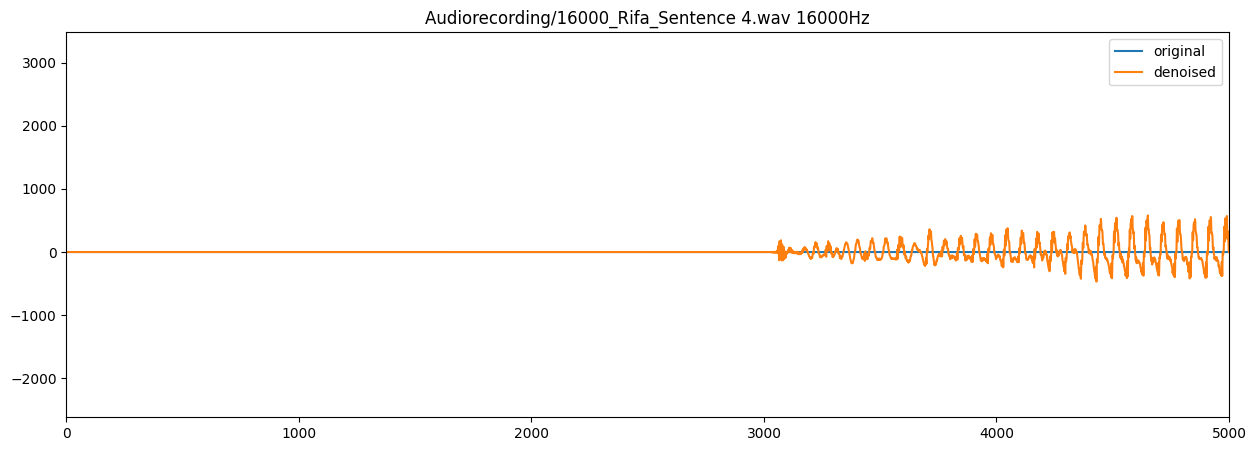

500 [0 0 0 ... 0 0 0]


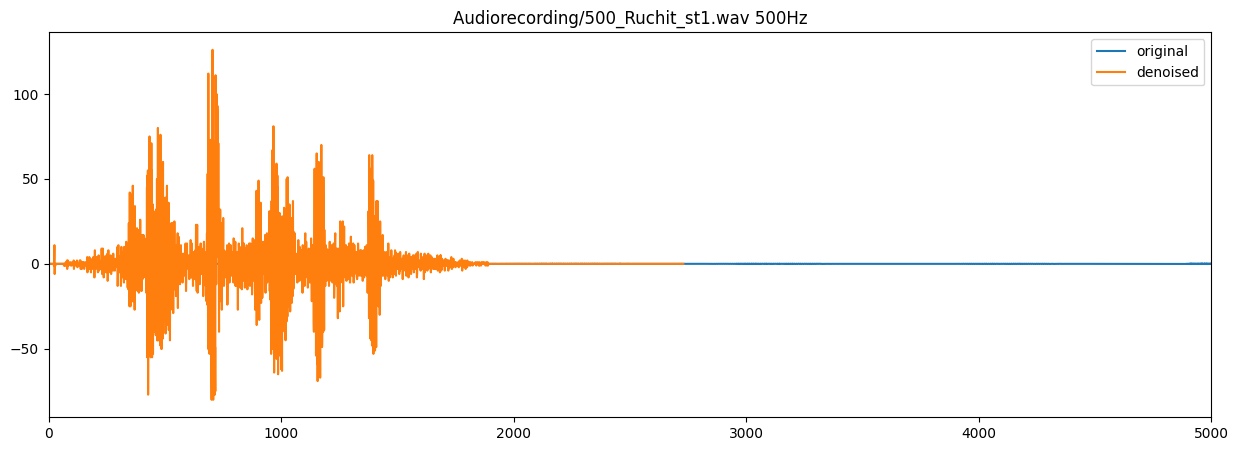

2000 [0 0 0 ... 0 0 0]


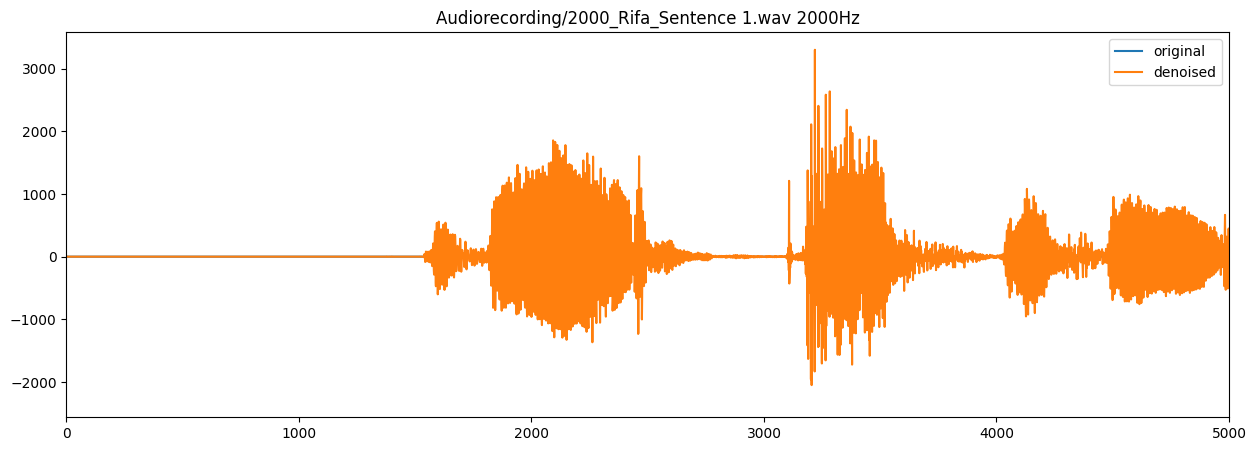

2000 [0 0 0 ... 0 0 0]


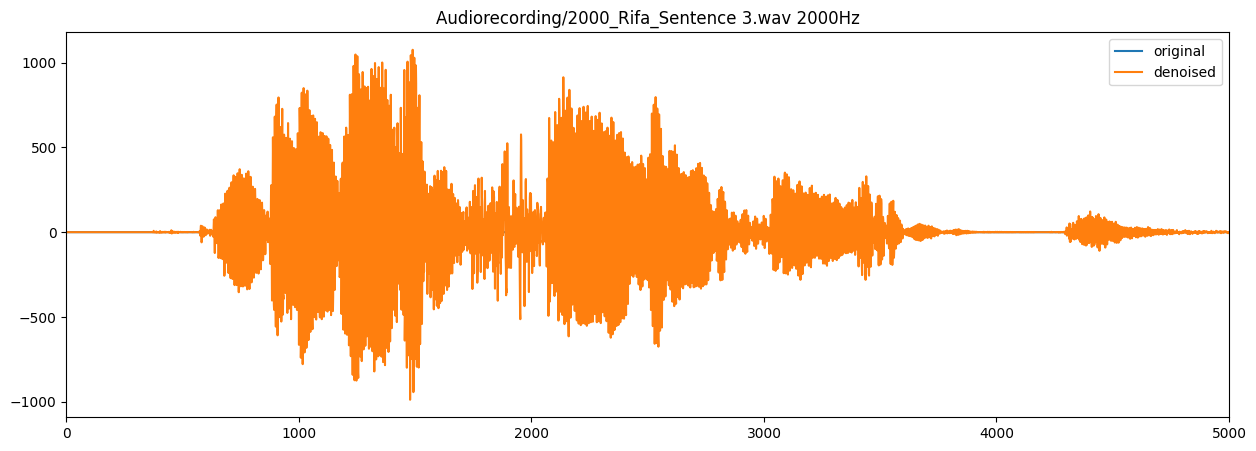

500 [0 0 0 ... 0 0 0]


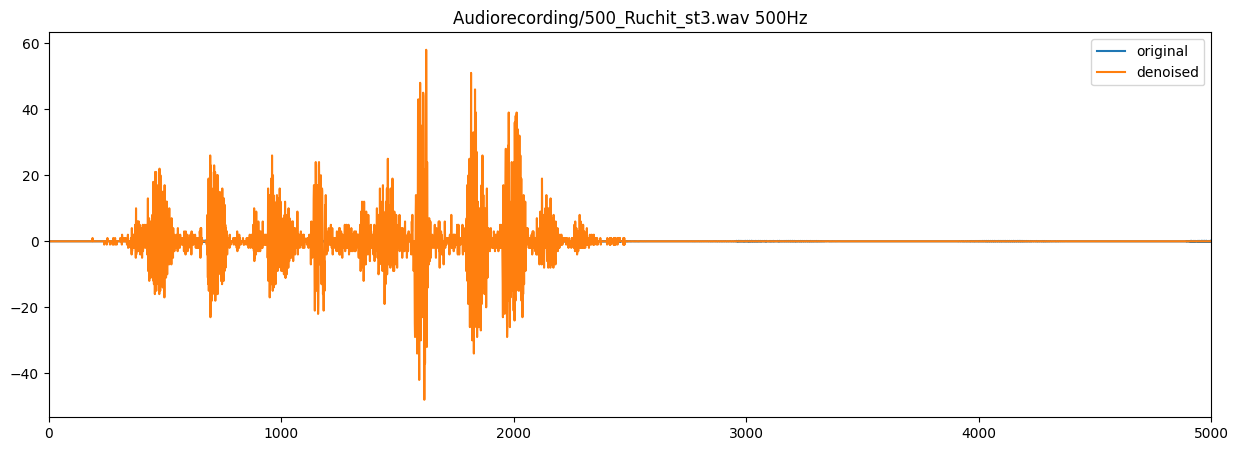

2000 [0 0 0 ... 0 0 0]


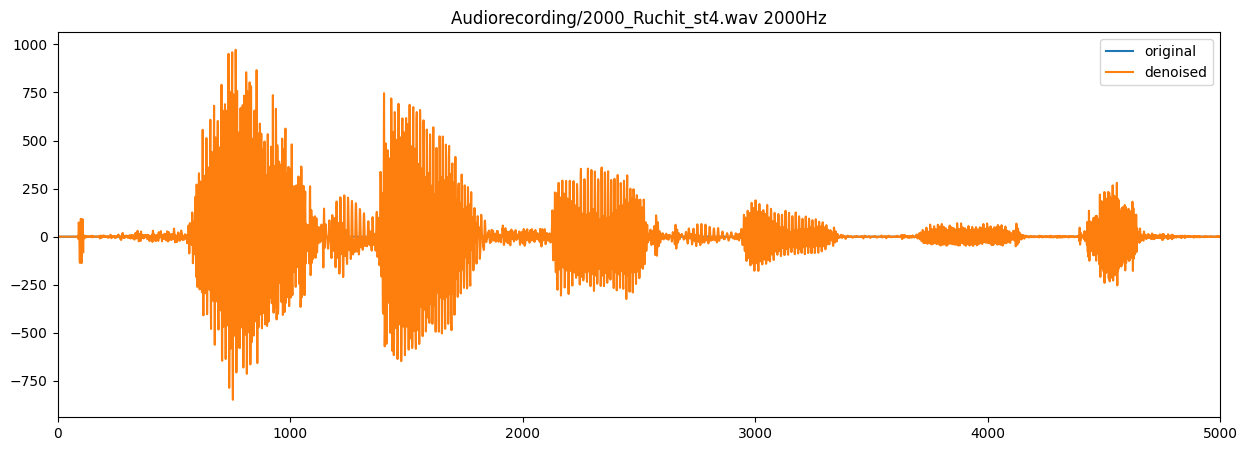

500 [0 0 0 ... 0 0 0]


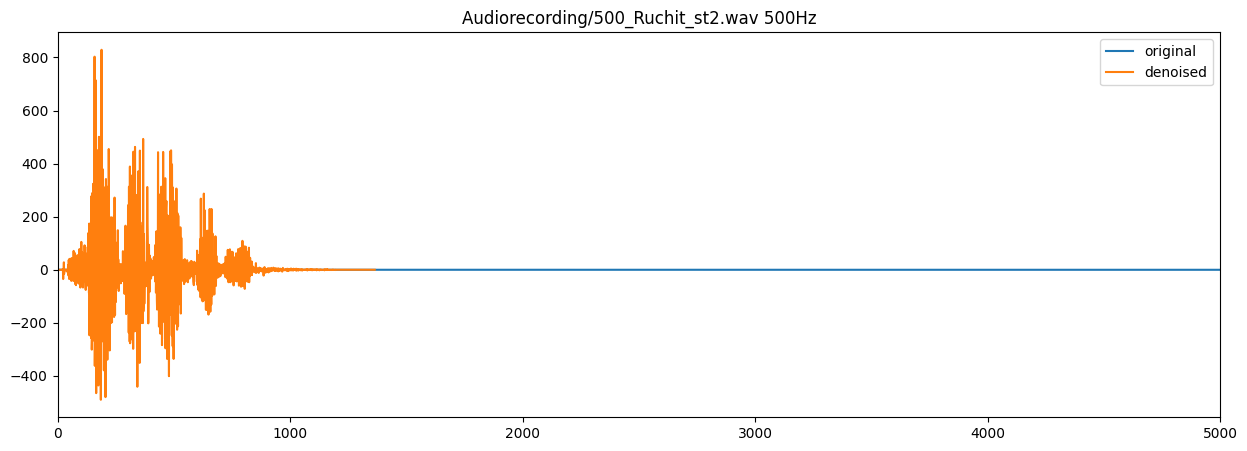

2000 [0 0 0 ... 0 0 0]


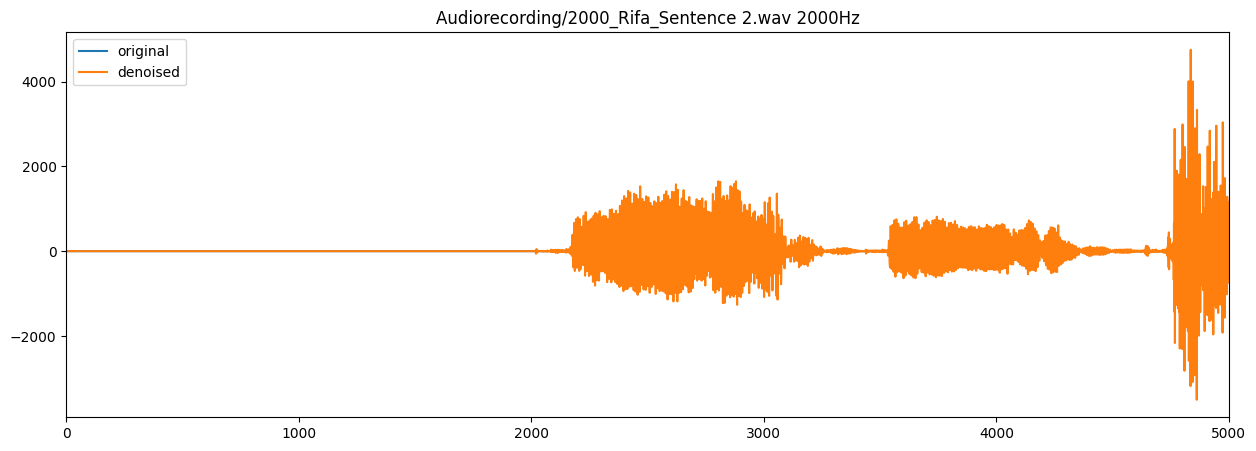

16000 [0 0 0 ... 0 0 0]


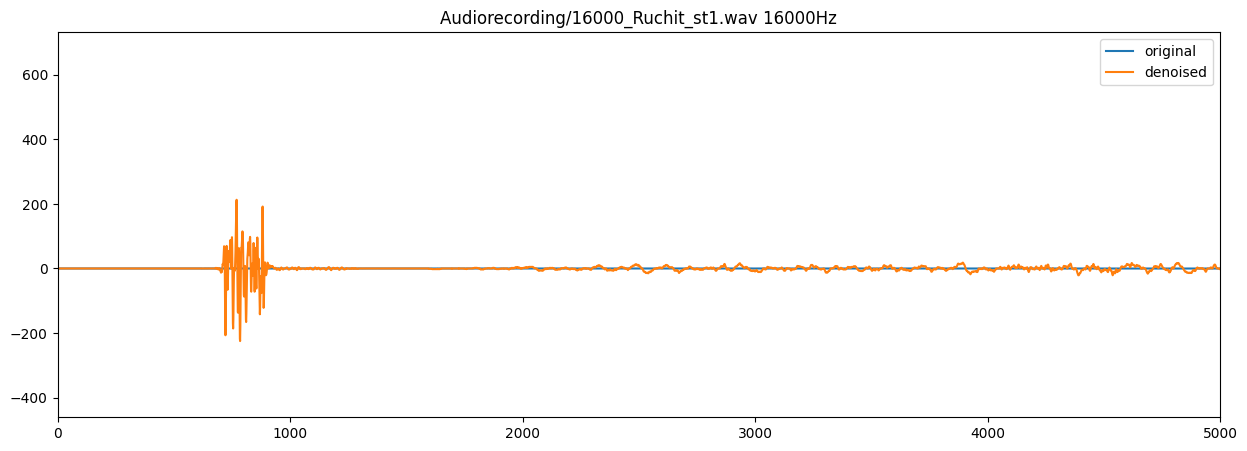

500 [0 0 0 ... 0 0 0]


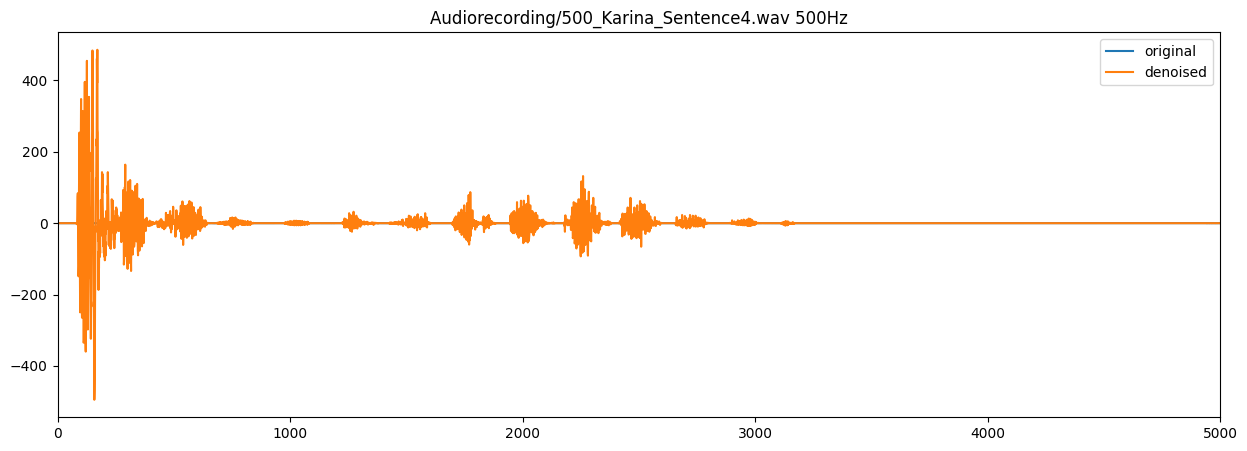

2000 [0 0 0 ... 0 0 0]


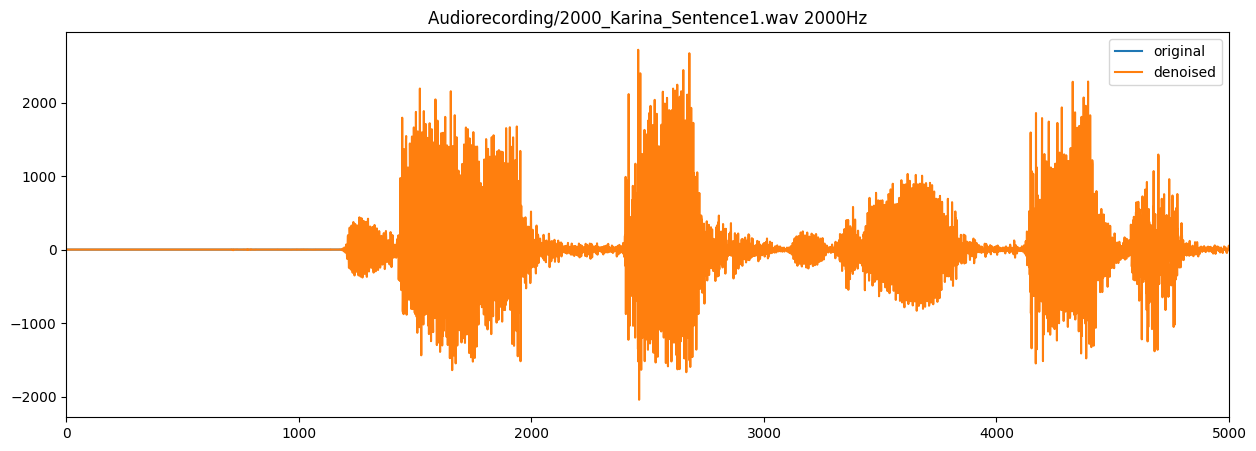

2000 [0 0 0 ... 0 0 0]


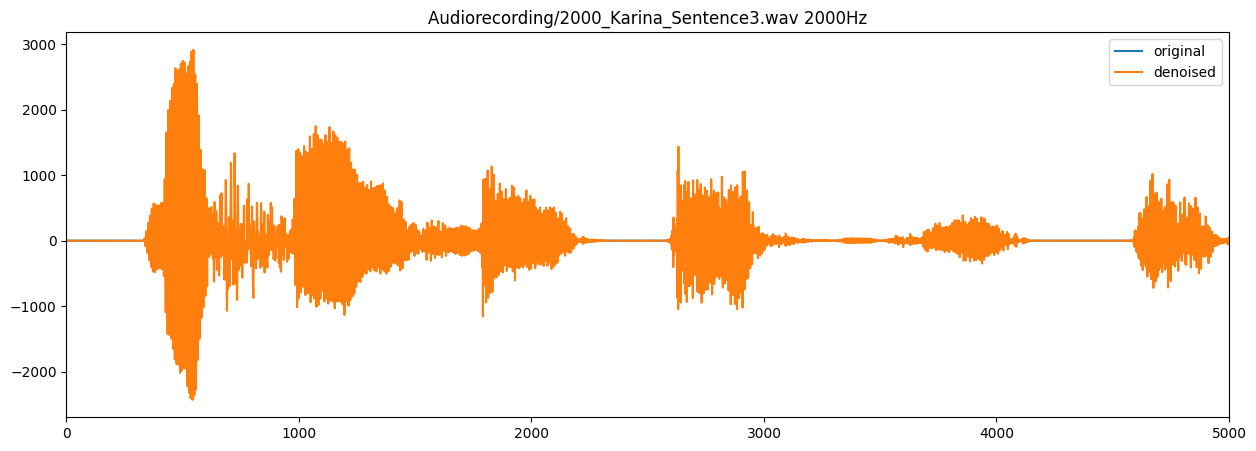

16000 [0 0 0 ... 0 0 0]


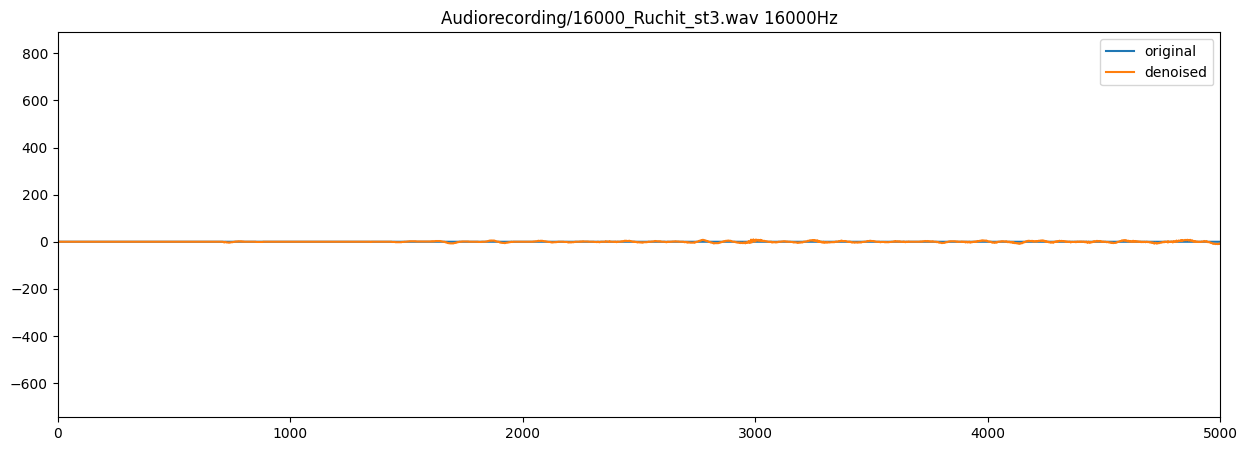

16000 [0 0 0 ... 0 0 0]


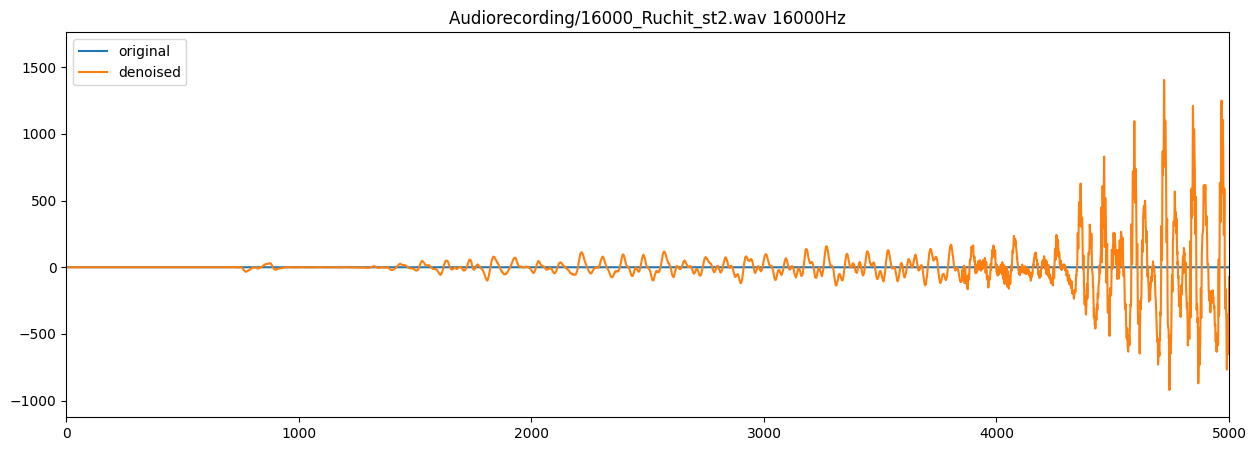

16000 [0 0 0 ... 0 0 0]


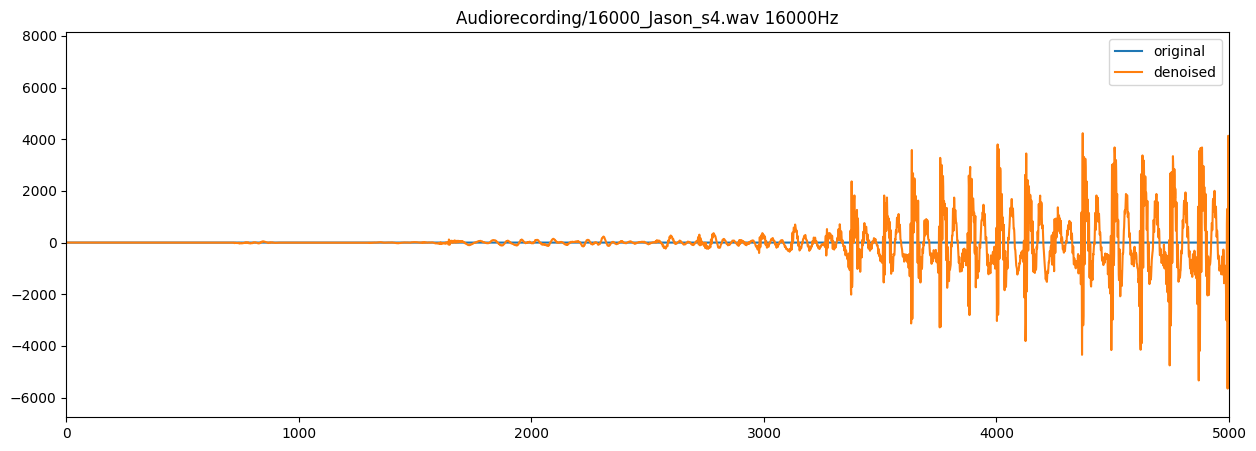

2000 [0 0 0 ... 0 0 0]


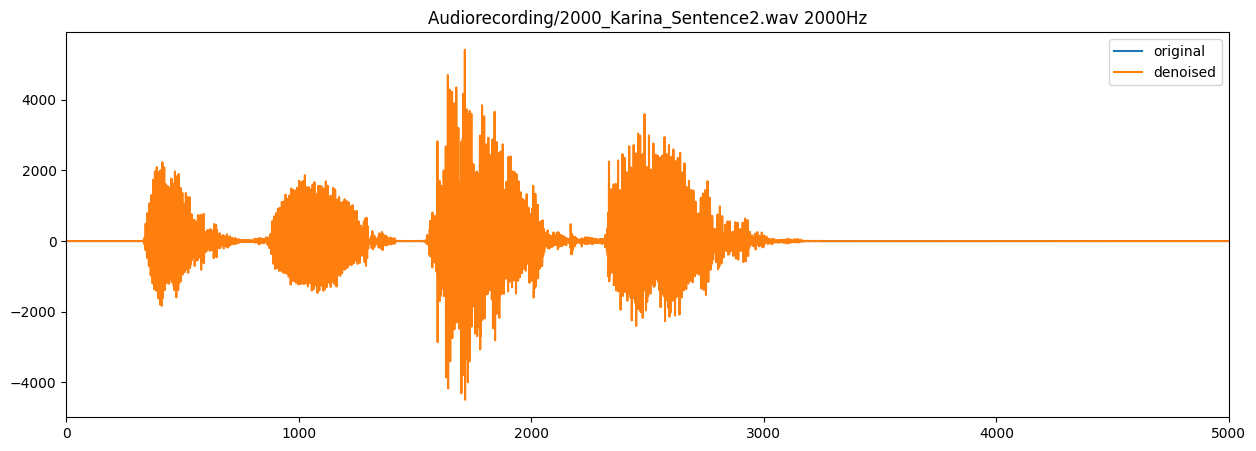

500 [0 0 0 ... 0 0 0]


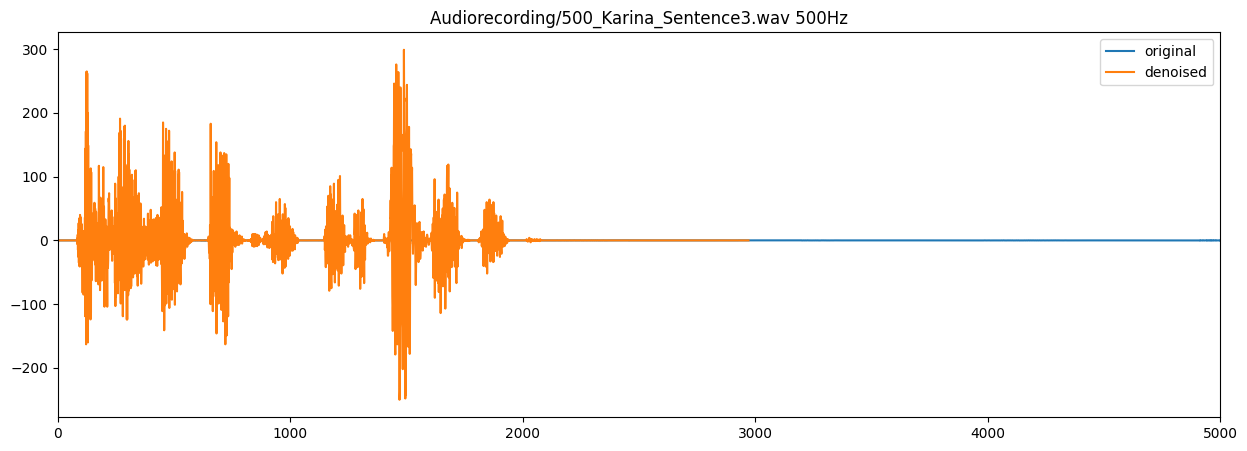

16000 [0 0 0 ... 0 0 0]


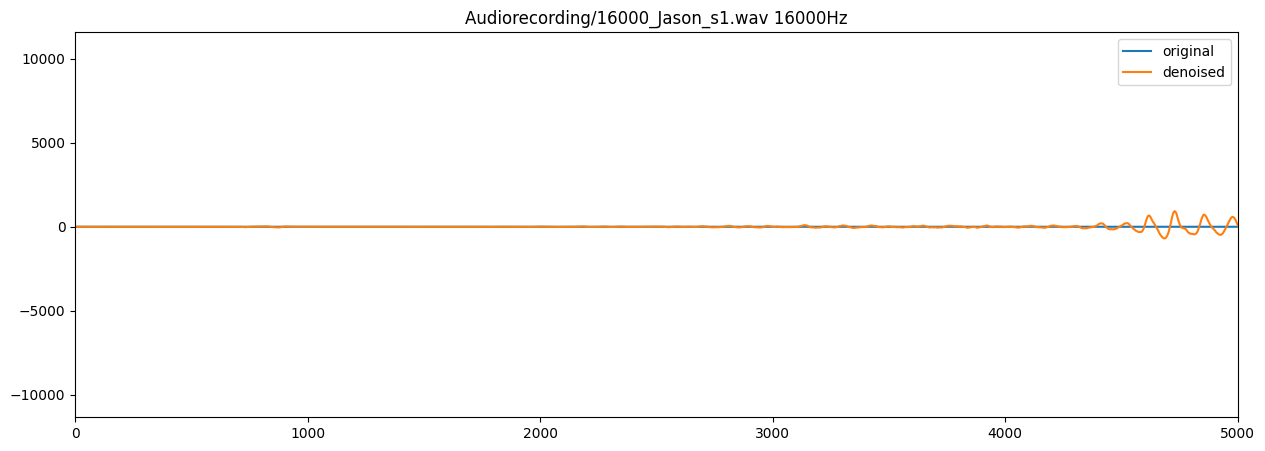

500 [0 0 0 ... 0 0 0]


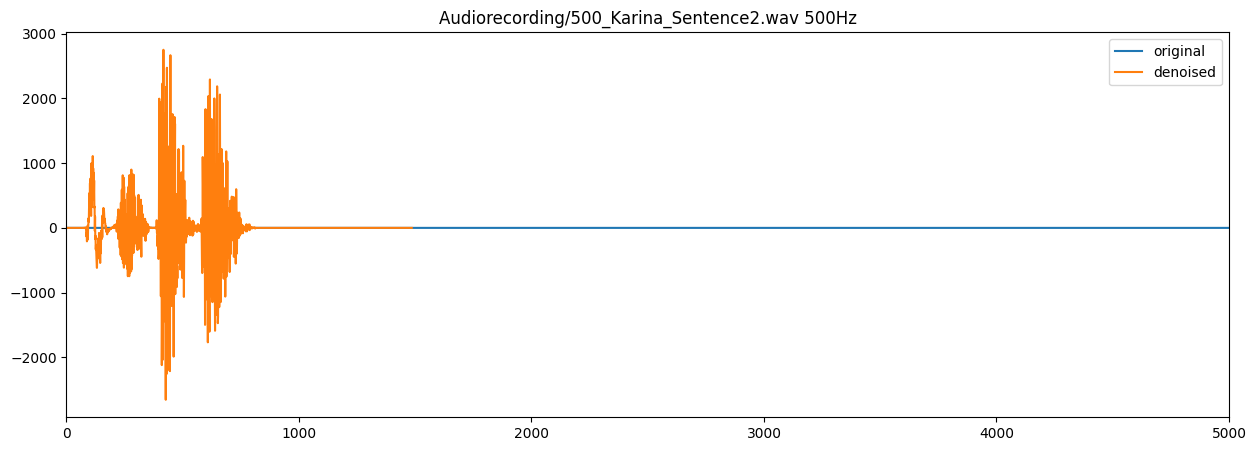

16000 [0 0 0 ... 0 0 0]


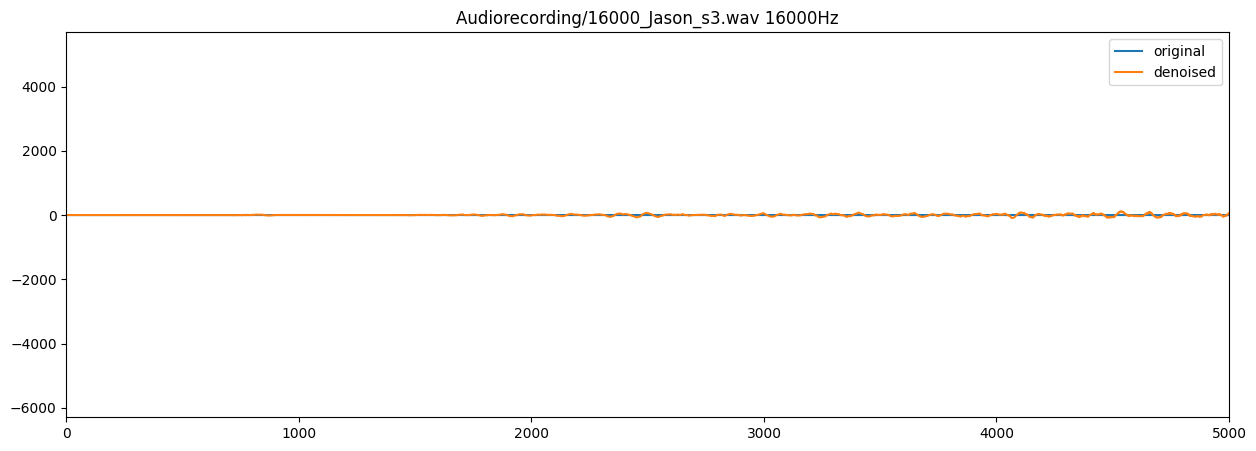

16000 [0 0 0 ... 0 0 0]


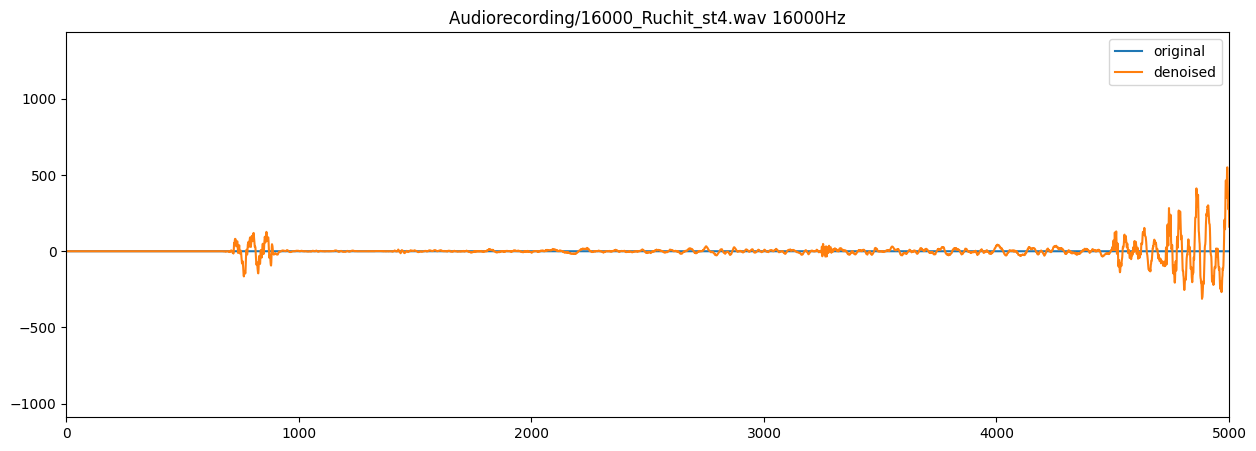

16000 [0 0 0 ... 0 0 0]


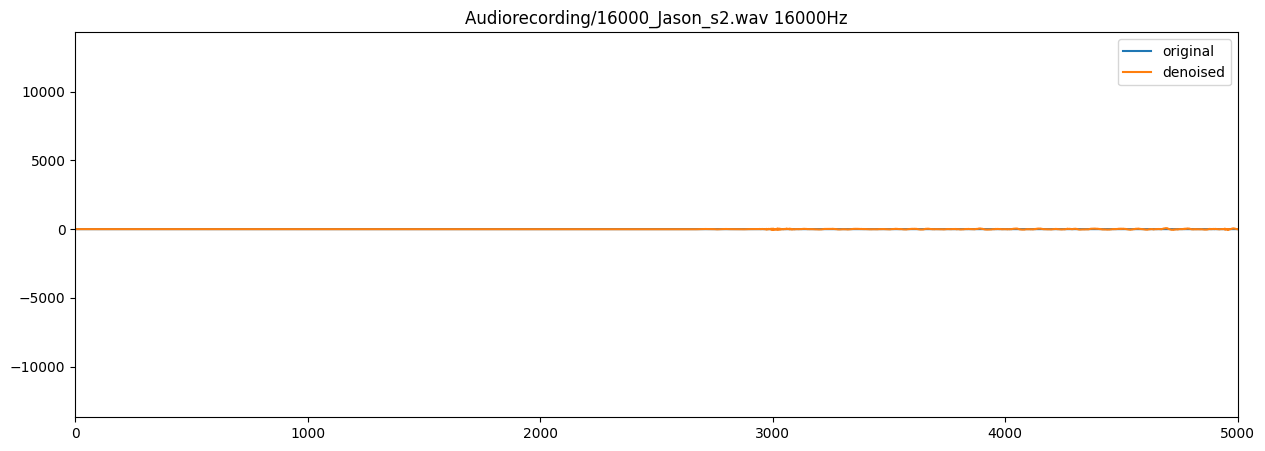

500 [0 0 0 ... 0 0 0]


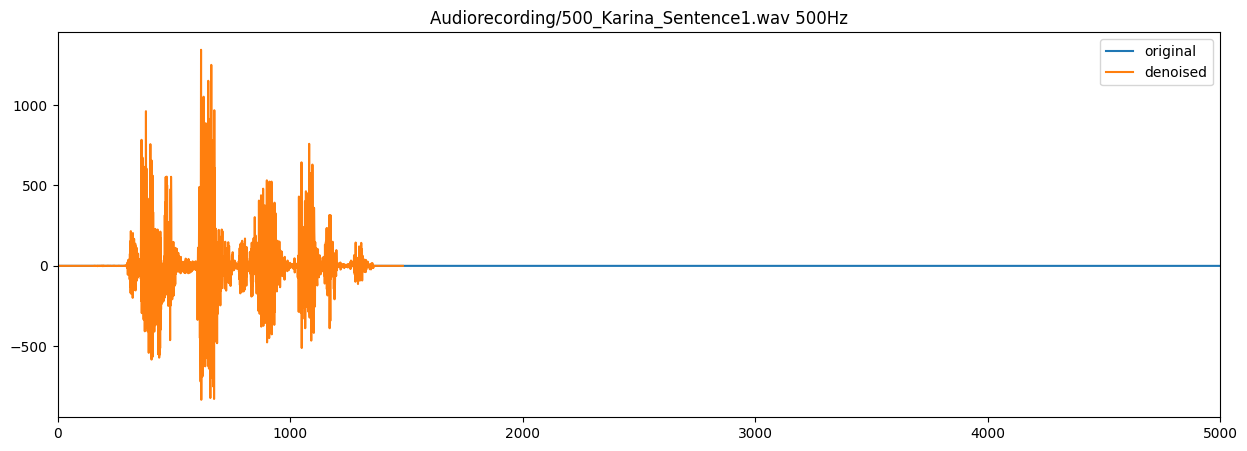

2000 [0 0 0 ... 0 0 0]


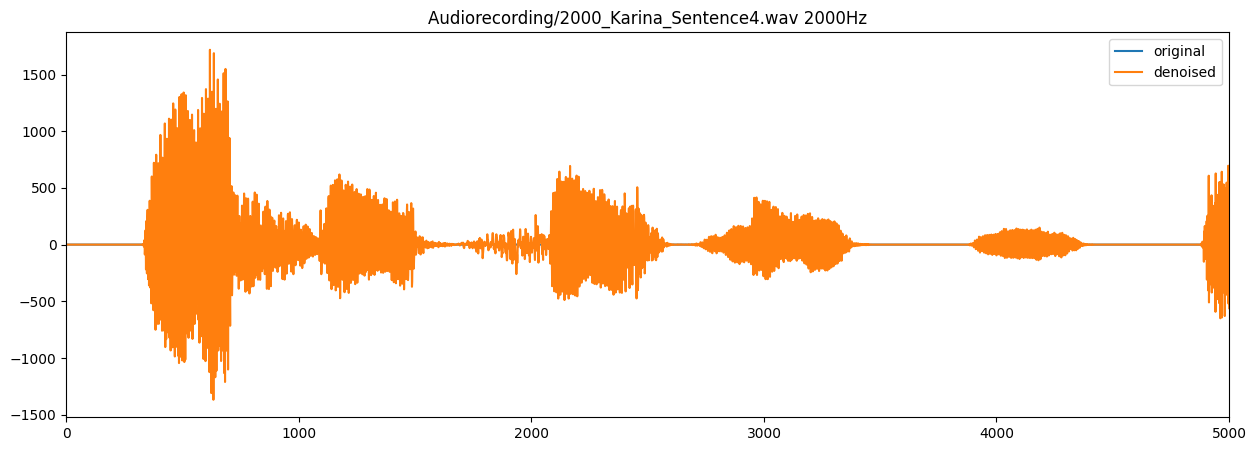

In [11]:
# plotting the denoised graph and audio graph and then saving the denoised file
# only plotting part of the wave
for i in file_path :
    sr, audio = wavfile.read(i)
    print(sr, audio)

    plt.figure(figsize = (15,5))
    
    plt.title(i + " " + str(sr) + "Hz")
    plt.plot(samples, label="original")
    
    fsamples = denoise(audio, sr)
    plt.plot(fsamples, label="denoised")
    plt.legend()
    plt.xlim(0,5000)
    # plt.ylim(-10000,10000)
    plt.show()
    wavfile.write("Denoised/denoised_" + i.split("/")[1], sr, fsamples)